# Future Baby Names Prediction: Leveraging Famous Influences with Machine Learning

In [2]:
import zipfile
import os
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm
from scipy import stats
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF 
%matplotlib inline

## 1. Gather data

### **1.1.** Problem Statement
A baby's name is the first gift parents give to their child, embodying their hopes, love, and blessings. While parents may not be able to accompany their children throughout their entire lives, the name they choose will remain with their child forever. Naming a child is not a random act but a product of careful thought and consideration. Parents often devote significant time and energy to the process, as a name carries immense importance, shaping the child's self-identity, achievements, and even how they are perceived by others.

The choice of a baby's name is influenced by various factors, including parents' social experiences, family relationships, cultural sensitivities, and the symbolic sound of names. The popularity of certain names can fluctuate, sometimes following striking boom-and-bust patterns, while other names exhibit regional variations that reflect cultural differences.  In Western countries, the cultural landscape has evolved significantly due to increasing immigration, which has added new layers of diversity to personal naming practices. The names parents choose often reflect not only their social identities but also their aspirations for their children to carry on cultural and traditional values.

Famous individuals also play a significant role in baby naming. The tendency to name children after U.S. presidents is well-documented, and celebrities often influence name trends as well. Conversely, notorious figures, such as serial killers, can also impact the popularity of certain names. In this context, it is worth exploring how both famous and infamous people shape the choices parents make when naming their children.

Reference:

1 Huey, Raymond B., and Donald B. Miles. "Signatures of geography, climate and foliage on given names of baby girls." Evolutionary Human Sciences 4 (2022): e56.

2 Varnum, Michael EW, and Shinobu Kitayama. "What’s in a name? Popular names are less common on frontiers." Psychological science 22.2 (2011): 176-183.

3 Rogerson, Peter A. "The Effects of Months, Holidays, and the Birthdays of Presidents on Choice of Baby Names." Names 64.4 (2016): 234-241.

### **1.2.** Gather 4 Datasets

Here, we gathered the 4 datasets to make the prediction of the popular baby name in future via machine learning. (More information can be found in data_links.md)

The datasets information:

1 National baby name from 1880 to 2023.

2 Each state baby name from 1910 to 2019.

3 Popular babyname (Top 100) from 1952 to 2023.

4 Famous peope name.

#### **Dataset 1**

Type: Zip file

Details: *The data was gathered from the United States Social Security Administration's Baby Names dataset. * 

Dataset variables:

*   *Year: Implicit from the filename YYYY.* 
*   *Name: The name given to babies.* 
*   *Gender: The gender of the babies ('M' for male, 'F' for female).* 
*   *Count: The number of babies given that name*

In [3]:
# Define the path to the ZIP file
zip_file_path = 'names.zip'

# Directory to extract the contents of the ZIP file
extract_dir = 'extracted_names'
# Create a directory to extract the files
os.makedirs(extract_dir, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the extracted files to verify
extracted_files = os.listdir(extract_dir)

print(extracted_files)

# Read the extracted files into a list of DataFrames
dataframes = []

# Iterate over each extracted file
for file_name in extracted_files:
    if file_name.endswith('.txt'):   
        # Extract year from the file name   
        year = int(file_name[3:7])  # Extracting 'YYYY' from 'yobYYYY.txt'
        
        # Read data from the file
        file_path = os.path.join(extract_dir, file_name)
        
        # Assuming structure of the text file is "Name,Gender,Count"
        df = pd.read_csv(file_path, names=['Name', 'Gender', 'Count'])
        
        # Add year column to the dataframe
        df['Year'] = year
        
        # Append dataframe to the list
        dataframes.append(df)

# Concatenate all dataframes into a single dataframe
combined_df = pd.concat(dataframes, ignore_index=True)

# Check for missing values
print(combined_df.isnull().sum())

# Convert Count to numeric type (if necessary)
combined_df['Count'] = pd.to_numeric(combined_df['Count'], errors='coerce')

# Validate cleaned data
print(combined_df.head())

# Save cleaned data to a new file or further analysis
combined_df.to_csv('dataset1.csv', index=False)


['yob2000.txt', 'yob2014.txt', 'yob1938.txt', 'yob1910.txt', 'yob1904.txt', 'yob1905.txt', 'yob1911.txt', 'yob1939.txt', 'yob2015.txt', 'yob2001.txt', 'yob2017.txt', 'yob2003.txt', 'yob1907.txt', 'yob1913.txt', 'yob1898.txt', 'yob1899.txt', 'yob1912.txt', 'yob1906.txt', 'yob2002.txt', 'yob2016.txt', 'yob2012.txt', 'yob2006.txt', 'yob1902.txt', 'yob1916.txt', 'yob1889.txt', 'yob1888.txt', 'yob1917.txt', 'yob1903.txt', 'yob2007.txt', 'yob2013.txt', 'yob2005.txt', 'yob2011.txt', 'yob1915.txt', 'yob1901.txt', 'yob1929.txt', 'yob1928.txt', 'yob1900.txt', 'yob1914.txt', 'yob2010.txt', 'yob2004.txt', 'yob1973.txt', 'yob1967.txt', 'yob1998.txt', 'yob1999.txt', 'yob1966.txt', 'yob1972.txt', 'yob1958.txt', 'yob1964.txt', 'yob1970.txt', 'yob1971.txt', 'yob1965.txt', 'yob1959.txt', 'yob1961.txt', 'yob1975.txt', 'yob1949.txt', 'yob1948.txt', 'yob1974.txt', 'yob1960.txt', 'yob1976.txt', 'yob1962.txt', 'yob1989.txt', 'yob1988.txt', 'yob1963.txt', 'yob1977.txt', 'yob1952.txt', 'yob1946.txt', 'yob1991.

#### **Dataset 2**
Type: *CSV Files*

Details: Dataset of US baby names from 1910 to 2021. Includes State, Sex, Year, Name, and Count as features.

Dataset variables:
*   *State: The stat.* 
*   *Year: Implicit from the filename YYYY.* 
*   *Name: The name given to babies.* 
*   *Gender: The gender of the babies ('M' for male, 'F' for female).* 
*   *Count: The number of babies given that name*

In [4]:
file_path = 'baby_names_state.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)


# Save DataFrame to dataset2.csv
df.to_csv('dataset2.csv')

# Display the first few rows to verify
print(df.head())

   Unnamed: 0 State Sex  Year    Name  Count
0           0    GA   F  1910    Mary    841
1           1    GA   F  1910   Annie    553
2           2    GA   F  1910  Mattie    320
3           3    GA   F  1910    Ruby    279
4           4    GA   F  1910  Willie    275


#### **Dataset 3**
Type: *CSV Files*

Details: *Popular Baby Names from 1952 to 2023 * 

Dataset variables:
*   *Rank: The popularity of the baby name in each year.*
*   *Year: Implicit from the filename YYYY.* 
*   *Name: The name given to babies.* 
*   *Gender: The gender of the babies.* 
*   *Number: The number of babies given that name*

In [5]:
file_path = 'popular_baby_names_1952_to_2023.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Save DataFrame to dataset3.csv
df.to_csv('dataset3.csv')

# Display the first few rows to verify
print(df.head())

   Rank      Name  Number Gender  Year
0     1    OLIVER     555   Male  2023
1     2      NOAH     537   Male  2023
2     3       LEO     409   Male  2023
3     4     HENRY     404   Male  2023
4     5  THEODORE     400   Male  2023


#### **Dataset 4**
Type: *CSV Files*

Details: *This dataset includes all personal names listed in the Wikipedia category “American people by ethnic or national origin” and all subcategories fitting the pattern “American People of [ ] descent”, in total more than 25,000 individuals. Each individual is represented by a row, with columns indicating binary membership (0/1) in each ethnic/national category.* 


In [6]:
file_path = 'americans_by_descent.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Save DataFrame to dataset3.csv
df.to_csv('dataset4.csv')

# Display the first few rows to verify
print(df.head())

     id                   name  African  Arab  Caribbean  European  \
0   595           Andre Agassi        0     0          0         1   
1   864            Andy Warhol        0     0          0         1   
2  1384    Amos Bronson Alcott        0     0          0         1   
3  1624         Andrew Johnson        0     0          0         1   
4  1806  Arnold Schwarzenegger        0     0          0         1   

   Greenlandic  indigenous peoples  Jewish  Middle Eastern  ...  \
0            0                   1       0               1  ...   
1            0                   0       0               0  ...   
2            0                   0       0               0  ...   
3            0                   0       0               0  ...   
4            0                   0       0               0  ...   

   Azad Kashmiri  Ilocano  Kapampangan  Javanese  Minangkabau  \
0              0        0            0         0            0   
1              0        0            0        

## 2. Assess data and Clean Data

Datasets 1, 2, and 3 will be used for exploratory data analysis (EDA) to examine the frequency and distribution of baby names across different years and states. Dataset 4 will focus on the influence of famous individuals on name popularity. For this analysis, I have chosen two examples: Bill Gates, formerly the world's wealthiest person, and Elon Musk, currently the wealthiest. Both are globally renowned figures in the same category, making them ideal for comparison. Additionally, "Bill" is a common name, while "Elon" is relatively rare, allowing us to glean valuable insights from contrasting these two names.

### **2.1** Dataset Inspection

In [7]:

# Load dataset1 from CSV file
dataset1 = pd.read_csv('dataset1.csv')

# Load dataset2 from CSV file
dataset2 = pd.read_csv('dataset2.csv')

# Load dataset3 from CSV file
dataset3 = pd.read_csv('dataset3.csv')


# Now you can proceed to inspect and analyze the datasets

print("Dataset 1 - First 5 Rows:")
print(dataset1.head())

print("\nDataset 2 - First 5 Rows:")
print(dataset2.head())

print("\nDataset 3 - First 5 Rows:")
print(dataset3.head())


Dataset 1 - First 5 Rows:
      Name Gender  Count  Year
0    Emily      F  25959  2000
1   Hannah      F  23086  2000
2  Madison      F  19968  2000
3   Ashley      F  17998  2000
4    Sarah      F  17713  2000

Dataset 2 - First 5 Rows:
   Unnamed: 0.1  Unnamed: 0 State Sex  Year    Name  Count
0             0           0    GA   F  1910    Mary    841
1             1           1    GA   F  1910   Annie    553
2             2           2    GA   F  1910  Mattie    320
3             3           3    GA   F  1910    Ruby    279
4             4           4    GA   F  1910  Willie    275

Dataset 3 - First 5 Rows:
   Unnamed: 0  Rank      Name  Number Gender  Year
0           0     1    OLIVER     555   Male  2023
1           1     2      NOAH     537   Male  2023
2           2     3       LEO     409   Male  2023
3           3     4     HENRY     404   Male  2023
4           4     5  THEODORE     400   Male  2023


In [8]:
# Check basic information about each dataset
# Example: Assuming dataset1, dataset2, and dataset3 are defined and loaded
print("Dataset 1 - Info:")
print(dataset1.info())

print("\nDataset 2 - Info:")
print(dataset2.info())

print("\nDataset 3 - Info:")
print(dataset3.info())

Dataset 1 - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117219 entries, 0 to 2117218
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Name    object
 1   Gender  object
 2   Count   int64 
 3   Year    int64 
dtypes: int64(2), object(2)
memory usage: 64.6+ MB
None

Dataset 2 - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890627 entries, 0 to 890626
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0.1  890627 non-null  int64 
 1   Unnamed: 0    890627 non-null  int64 
 2   State         890627 non-null  object
 3   Sex           890627 non-null  object
 4   Year          890627 non-null  int64 
 5   Name          890627 non-null  object
 6   Count         890627 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 47.6+ MB
None

Dataset 3 - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 0 to 14399
Data columns (total 6 colum

### **2.2** Remove Duplicates

In [9]:
#delete duplicated rows in dataset1
dataset1.drop_duplicates()

Name Gender  Count  Year
0          Emily      F  25959  2000
1         Hannah      F  23086  2000
2        Madison      F  19968  2000
3         Ashley      F  17998  2000
4          Sarah      F  17713  2000
...          ...    ...    ...   ...
2117214   Zyheem      M      5  2019
2117215    Zykel      M      5  2019
2117216   Zyking      M      5  2019
2117217      Zyn      M      5  2019
2117218    Zyran      M      5  2019

[2117219 rows x 4 columns]

In [10]:
#delete duplicated rows in dataset2
dataset2.drop_duplicates()

Unnamed: 0.1  Unnamed: 0 State Sex  Year      Name  Count
0                  0           0    GA   F  1910      Mary    841
1                  1           1    GA   F  1910     Annie    553
2                  2           2    GA   F  1910    Mattie    320
3                  3           3    GA   F  1910      Ruby    279
4                  4           4    GA   F  1910    Willie    275
...              ...         ...   ...  ..   ...       ...    ...
890622        890622      890622    VA   M  2019     Yerik      5
890623        890623      890623    VA   M  2019     Yosef      5
890624        890624      890624    VA   M  2019    Zakari      5
890625        890625      890625    VA   M  2019  Zakariya      5
890626        890626      890626    VA   M  2019      Zuri      5

[890627 rows x 7 columns]

In [11]:
#delete duplicated columns in dataset2
dataset2 = dataset2.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [12]:
dataset2

State Sex  Year      Name  Count
0         GA   F  1910      Mary    841
1         GA   F  1910     Annie    553
2         GA   F  1910    Mattie    320
3         GA   F  1910      Ruby    279
4         GA   F  1910    Willie    275
...      ...  ..   ...       ...    ...
890622    VA   M  2019     Yerik      5
890623    VA   M  2019     Yosef      5
890624    VA   M  2019    Zakari      5
890625    VA   M  2019  Zakariya      5
890626    VA   M  2019      Zuri      5

[890627 rows x 5 columns]

In [13]:
#delete duplicated rows in dataset3
dataset3.drop_duplicates()

Unnamed: 0  Rank      Name  Number  Gender  Year
0               0     1    OLIVER     555    Male  2023
1               1     2      NOAH     537    Male  2023
2               2     3       LEO     409    Male  2023
3               3     4     HENRY     404    Male  2023
4               4     5  THEODORE     400    Male  2023
...           ...   ...       ...     ...     ...   ...
14395       14395    98       KIM      67  Female  1952
14396       14396    99   DARRELL      54    Male  1952
14397       14397    99       SUE      66  Female  1952
14398       14398   100     DARYL      54    Male  1952
14399       14399   100      JEAN      65  Female  1952

[14400 rows x 6 columns]

In [14]:
#delete duplicated columns in dataset3
dataset3 = dataset3.drop(['Unnamed: 0'], axis=1)

In [15]:
dataset3

Rank      Name  Number  Gender  Year
0         1    OLIVER     555    Male  2023
1         2      NOAH     537    Male  2023
2         3       LEO     409    Male  2023
3         4     HENRY     404    Male  2023
4         5  THEODORE     400    Male  2023
...     ...       ...     ...     ...   ...
14395    98       KIM      67  Female  1952
14396    99   DARRELL      54    Male  1952
14397    99       SUE      66  Female  1952
14398   100     DARYL      54    Male  1952
14399   100      JEAN      65  Female  1952

[14400 rows x 5 columns]

In [16]:
# Check for missing values in each dataset
# Example: Assuming dataset1, dataset2, and dataset3 are defined and loaded
print("Dataset 1 - Missing Values:")
print(dataset1.isnull().sum())

print("\nDataset 2 - Missing Values:")
print(dataset2.isnull().sum())

print("\nDataset 3 - Missing Values:")
print(dataset3.isnull().sum())

Dataset 1 - Missing Values:
Name      0
Gender    0
Count     0
Year      0
dtype: int64

Dataset 2 - Missing Values:
State    0
Sex      0
Year     0
Name     0
Count    0
dtype: int64

Dataset 3 - Missing Values:
Rank      0
Name      0
Number    0
Gender    0
Year      0
dtype: int64


### **2.3** Missing Data

In [17]:
#make sure no duplicaed rows
print("Dataset 1 - Duplicated Rows:")
print(dataset1.duplicated().sum())

print("\nDataset 2 - Duplicated Rows:")
print(dataset2.duplicated().sum())

print("\nDataset 3 - Duplicated Rows:")
print(dataset3.duplicated().sum())


Dataset 1 - Duplicated Rows:
0

Dataset 2 - Duplicated Rows:
0

Dataset 3 - Duplicated Rows:
0


In [18]:
print("Dataset 1 - Info:")
print(dataset1.info())

print("\nDataset 2 - Info:")
print(dataset2.info())

print("\nDataset 3 - Info:")
print(dataset3.info())

Dataset 1 - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117219 entries, 0 to 2117218
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Name    object
 1   Gender  object
 2   Count   int64 
 3   Year    int64 
dtypes: int64(2), object(2)
memory usage: 64.6+ MB
None

Dataset 2 - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890627 entries, 0 to 890626
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   State   890627 non-null  object
 1   Sex     890627 non-null  object
 2   Year    890627 non-null  int64 
 3   Name    890627 non-null  object
 4   Count   890627 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 34.0+ MB
None

Dataset 3 - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 0 to 14399
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    14400 non-null  int64 
 1   Name    14

### **2.4** Formalize the Dataset

In [19]:
# Standardize Gender column in each dataset
dataset1.rename(columns={'Gender': 'Gender'}, inplace=True)

dataset2.rename(columns={'Sex': 'Gender'}, inplace=True)

dataset3.rename(columns={'Gender': 'Gender'}, inplace=True)
dataset3.rename(columns={'Number': 'Count'}, inplace=True)
dataset3['Gender'] = dataset3['Gender'].replace({'Female': 'F', 'Male': 'M'})

print("Dataset 1 - First 5 Rows:")
print(dataset1.head())

print("\nDataset 2 - First 5 Rows:")
print(dataset2.head())

print("\nDataset 3 - First 5 Rows:")
print(dataset3.head())

Dataset 1 - First 5 Rows:
      Name Gender  Count  Year
0    Emily      F  25959  2000
1   Hannah      F  23086  2000
2  Madison      F  19968  2000
3   Ashley      F  17998  2000
4    Sarah      F  17713  2000

Dataset 2 - First 5 Rows:
  State Gender  Year    Name  Count
0    GA      F  1910    Mary    841
1    GA      F  1910   Annie    553
2    GA      F  1910  Mattie    320
3    GA      F  1910    Ruby    279
4    GA      F  1910  Willie    275

Dataset 3 - First 5 Rows:
   Rank      Name  Count Gender  Year
0     1    OLIVER    555      M  2023
1     2      NOAH    537      M  2023
2     3       LEO    409      M  2023
3     4     HENRY    404      M  2023
4     5  THEODORE    400      M  2023


In [20]:
# Convert the Name column to match the style in Dataset 1 and Dataset 2
dataset3['Name'] = dataset3['Name'].str.capitalize()

# Display the first 5 rows to verify the change
print("\nDataset 3 - First 5 Rows:")
print(dataset3.head())


Dataset 3 - First 5 Rows:
   Rank      Name  Count Gender  Year
0     1    Oliver    555      M  2023
1     2      Noah    537      M  2023
2     3       Leo    409      M  2023
3     4     Henry    404      M  2023
4     5  Theodore    400      M  2023


### **2.5** Data Baisc Information

In [21]:
# Check categorical columns in each dataset

categoricals1 = dataset1.select_dtypes("object")
print("\nDataset 1 - categorical columns:")
print(categoricals1.head(2))

categoricals2 = dataset2.select_dtypes("object")
print("\nDataset 2 - categorical columns:")
print(categoricals2.head(2))

categoricals3 = dataset3.select_dtypes("object")
print("\nDataset 3 - categorical columns:")
print(categoricals3.head(2))


Dataset 1 - categorical columns:
     Name Gender
0   Emily      F
1  Hannah      F

Dataset 2 - categorical columns:
  State Gender   Name
0    GA      F   Mary
1    GA      F  Annie

Dataset 3 - categorical columns:
     Name Gender
0  Oliver      M
1    Noah      M


In [22]:
# Distribution of 'Name'
Name1_dist = dataset1['Name'].value_counts()
print("\nDataset 1 - name distribution:")
print(Name1_dist)

Name2_dist = dataset2['Name'].value_counts()
print("\nDataset 2 - name distribution:")
print(Name2_dist)

Name3_dist = dataset3['Name'].value_counts()
print("\nDataset 3 - name distribution:")
print(Name3_dist)


Dataset 1 - name distribution:
Name
John        288
Jessie      288
Marion      288
Ollie       288
Tommie      288
           ... 
Shanchez      1
Habeeba       1
Iba           1
Rupen         1
Zoser         1
Name: count, Length: 103564, dtype: int64

Dataset 2 - name distribution:
Name
Jessie      1275
Lee         1135
James       1092
Leslie      1038
Marion      1030
            ... 
Keyaira        1
Khala          1
Quatasia       1
Teyanna        1
Usman          1
Name: count, Length: 13074, dtype: int64

Dataset 3 - name distribution:
Name
Joseph       72
James        72
Michael      72
Daniel       72
Elizabeth    72
             ..
Maisie        1
Margot        1
Lucia         1
Lottie        1
Jean          1
Name: count, Length: 717, dtype: int64


In [23]:
# Distribution of 'Gender'
Gender1_dist = dataset1['Gender'].value_counts()
print("\nDataset 1 - Gender distribution:")
print(Gender1_dist)

Gender2_dist = dataset2['Gender'].value_counts()
print("\nDataset 2 - Gender distribution:")
print(Gender2_dist)

Gender3_dist = dataset3['Gender'].value_counts()
print("\nDataset 3 - Gender distribution:")
print(Gender3_dist)


Dataset 1 - Gender distribution:
Gender
F    1245559
M     871660
Name: count, dtype: int64

Dataset 2 - Gender distribution:
Gender
F    486781
M    403846
Name: count, dtype: int64

Dataset 3 - Gender distribution:
Gender
M    7200
F    7200
Name: count, dtype: int64


In [24]:
# Distribution of 'State'
State2_dist = dataset2['State'].value_counts()
print("\nDataset 2 - State distribution:")
print(State2_dist)


Dataset 2 - State distribution:
State
GA    184897
NC    175577
VA    149300
TN    142301
KY    119439
SC    119113
Name: count, dtype: int64


In [25]:
# Check numeric columns in each dataset

categoricals1 = dataset1.select_dtypes("number")
print("\nDataset 1 - numeric columns:")
print(categoricals1.head(2))

categoricals2 = dataset2.select_dtypes("number")
print("\nDataset 2 - numeric columns:")
print(categoricals2.head(2))

categoricals3 = dataset3.select_dtypes("number")
print("\nDataset 3 - numeric columns:")
print(categoricals3.head(2))


Dataset 1 - numeric columns:
   Count  Year
0  25959  2000
1  23086  2000

Dataset 2 - numeric columns:
   Year  Count
0  1910    841
1  1910    553

Dataset 3 - numeric columns:
   Rank  Count  Year
0     1    555  2023
1     2    537  2023


In [26]:
# Distribution of 'Year'
Year1_desc = dataset1['Year'].describe()
print("\nDataset 1 - year information:")
print(Year1_desc)

Year2_desc = dataset2['Year'].describe()
print("\nDataset 2 - year information:")
print(Year2_desc)

Year3_desc = dataset3['Year'].describe()
print("\nDataset 3 - year information:")
print(Year3_desc)


Dataset 1 - year information:
count    2.117219e+06
mean     1.978991e+03
std      3.499572e+01
min      1.880000e+03
25%      1.956000e+03
50%      1.989000e+03
75%      2.007000e+03
max      2.023000e+03
Name: Year, dtype: float64

Dataset 2 - year information:
count    890627.000000
mean       1974.306335
std          32.031128
min        1910.000000
25%        1948.000000
50%        1979.000000
75%        2003.000000
max        2019.000000
Name: Year, dtype: float64

Dataset 3 - year information:
count    14400.000000
mean      1987.500000
std         20.783327
min       1952.000000
25%       1969.750000
50%       1987.500000
75%       2005.250000
max       2023.000000
Name: Year, dtype: float64


In [27]:
# Distribution of 'Count'
Count1_desc = dataset1['Count'].describe()
print("\nDataset 1 - count information:")
print(Count1_desc)

Count2_desc = dataset2['Count'].describe()
print("\nDataset 2 - count information:")
print(Count2_desc)

Count3_desc = dataset3['Count'].describe()
print("\nDataset 3 - count information:")
print(Count3_desc)


Dataset 1 - count information:
count    2.117219e+06
mean     1.741134e+02
std      1.473001e+03
min      5.000000e+00
25%      7.000000e+00
50%      1.200000e+01
75%      3.200000e+01
max      9.969300e+04
Name: Count, dtype: float64

Dataset 2 - count information:
count    890627.000000
mean         47.052894
std         124.273791
min           5.000000
25%           7.000000
50%          13.000000
75%          35.000000
max        3883.000000
Name: Count, dtype: float64

Dataset 3 - count information:
count    14400.000000
mean       260.150069
std        258.448155
min         51.000000
25%        108.000000
50%        166.000000
75%        305.000000
max       2796.000000
Name: Count, dtype: float64


## 3.  Basic Analysis

In [28]:
# Each Baby born numbers
yearly1_totals = dataset1.groupby('Year')['Count'].sum().reset_index()

yearly1_totals 

Year    Count
0    1880   201484
1    1881   192688
2    1882   221533
3    1883   216945
4    1884   243461
..    ...      ...
139  2019  3468791
140  2020  3337845
141  2021  3384687
142  2022  3378611
143  2023  3297246

[144 rows x 2 columns]

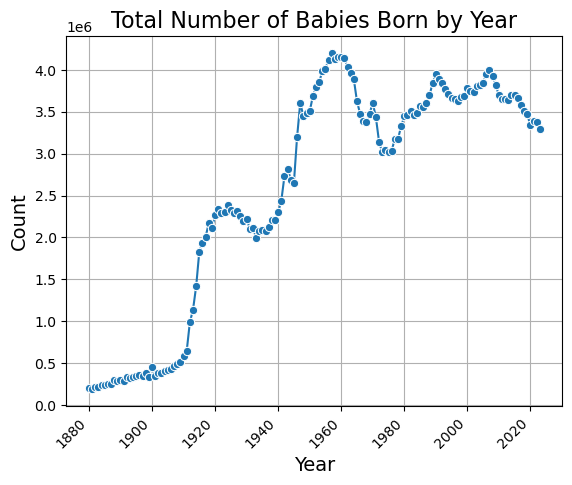

In [29]:
sns.lineplot(x='Year', y='Count', data=yearly1_totals, marker='o')
plt.xticks(rotation=45, ha='right')  
plt.title('Total Number of Babies Born by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)
plt.show()

When examining the total number of babies born by year, we observe a continuous increase in birth numbers from 1880 to 1960. This growth is particularly notable after 1910, where the rate of increase accelerated significantly. However, between 1960 and 1970, there was a slight decline in the number of births. From 1980 to 2023, the birth numbers have remained relatively stable, showing little fluctuation.

In [30]:
# Each Baby born numbers

yearly_Gender_totals = dataset1.groupby(['Year', 'Gender'])['Count'].sum().reset_index()

yearly_Gender_totals

Year Gender    Count
0    1880      F    90994
1    1880      M   110490
2    1881      F    91953
3    1881      M   100735
4    1882      F   107847
..    ...    ...      ...
283  2021      M  1746499
284  2022      F  1636657
285  2022      M  1741954
286  2023      F  1596022
287  2023      M  1701224

[288 rows x 3 columns]

In [31]:
#Get the Female and Male Ratio

pivot_gender_df = yearly_Gender_totals.pivot(index='Year', columns='Gender', values='Count')

pivot_gender_df['Gender_Ratio'] = pivot_gender_df['M'] / pivot_gender_df['F']

pivot_gender_df

Gender        F        M  Gender_Ratio
Year                                  
1880      90994   110490      1.214256
1881      91953   100735      1.095505
1882     107847   113686      1.054142
1883     112320   104625      0.931490
1884     129019   114442      0.887017
...         ...      ...           ...
2019    1676568  1792223      1.068983
2020    1614196  1723649      1.067807
2021    1638188  1746499      1.066116
2022    1636657  1741954      1.064337
2023    1596022  1701224      1.065915

[144 rows x 3 columns]

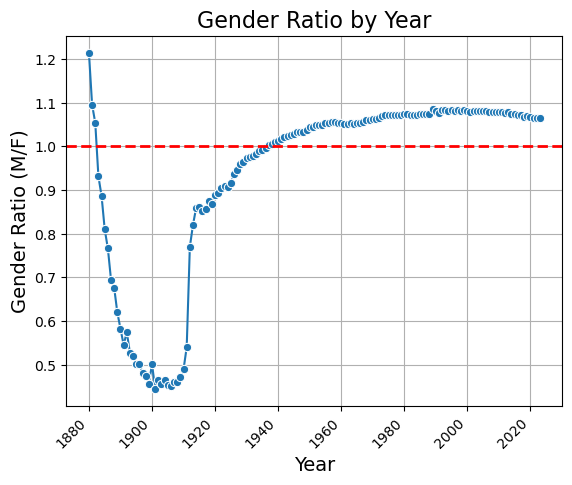

In [32]:
# Reset the index to convert 'Year' from an index to a column
pivot_gender_df_reset = pivot_gender_df.reset_index()

sns.lineplot(x='Year', y='Gender_Ratio', data=pivot_gender_df_reset, marker='o')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.title('Gender Ratio by Year', fontsize=16)
plt.axhline(y=1, color='red', linestyle='--', linewidth=2, label='Ratio = 1')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Gender Ratio (M/F)', fontsize=14)
plt.grid(True)
plt.show()

During the 1880s – later characterized as being a high point of the Second Industrial Revolution and the Gilded Age – Americans experienced exceptional industrial development and economic growth. Railroads became more prevalent throughout the country, allowing faster and more convenient means of travel. Despite the economic prosperity that flourished during the 1880s, the decade was also a period of great violence and political upheaval.

Progressive Era to New Era, 1900-1929
The early 20th century was an era of business expansion and progressive reform in the United States. 

The Great Depression (1929–1939) was a severe global economic downturn that affected many countries across the world. It became evident after a sharp decline in stock prices in the United States, the largest economy in the world at the time, leading to a period of economic depression.

Immigration
Between 1880 and 1930, 27–28 million immigrants entered the United States, primarily from eastern and southern Europe. This was the largest migration in human history at the time. Immigrants came through Ellis Island in New York Harbor and faced mixed reactions from Americans. Some Americans favored immigration, but many opposed it, especially after the Chinese Exclusion Act of 1882 placed restrictions on Chinese immigration.

Urbanization
Between 1870 and 1920, 11 million people moved from rural to urban areas, and by 1920, more Americans lived in cities than in rural areas for the first time. (From Google)


(Source:
https://www.gammaphibeta.org/gpb/a1cbae93-87c2-400b-b258-2fb9dcd79b33/The-1880s

https://www.loc.gov/classroom-materials/united-states-history-primary-source-timeline/progressive-era-to-new-era-1900-1929/

https://en.wikipedia.org/wiki/Great_Depression
)

Historical data and trends suggest a potential relationship between societal conditions and the gender ratio of newborns. Specifically, there appears to be a tendency for more female babies to be born during times of economic instability or societal stress. This phenomenon might be explained by evolutionary biology, where female offspring may be favored due to their generally higher resilience and better adjustment to adverse conditions. However, this hypothesis requires further empirical evidence, as the relationship between societal stressors and birth gender ratios remains complex and is influenced by multiple factors.(Related reading: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3427585/
Book: How to Choose the Sex of Your Baby)

In [33]:
#Get the Baby Born State
# Each Baby born numbers
year2_babies=dataset2.groupby(['Year']).sum('Count')
print(year2_babies.head(150))


       Count
Year        
1910  105001
1911  105639
1912  152655
1913  170399
1914  209823
...      ...
2015  428148
2016  423173
2017  418059
2018  412586
2019  406712

[110 rows x 1 columns]


In [34]:
dataset2['State'].unique()

array(['GA', 'KY', 'NC', 'SC', 'TN', 'VA'], dtype=object)

In [35]:

# Each state baby born numbers
yearly_State_totals = dataset2.groupby(['Year', 'State'])['Count'].sum().reset_index()

yearly_State_totals

Year State  Count
0    1910    GA  24589
1    1910    KY  15213
2    1910    NC  19074
3    1910    SC  14982
4    1910    TN  15281
..    ...   ...    ...
655  2019    KY  37603
656  2019    NC  94393
657  2019    SC  37924
658  2019    TN  65155
659  2019    VA  74078

[660 rows x 3 columns]

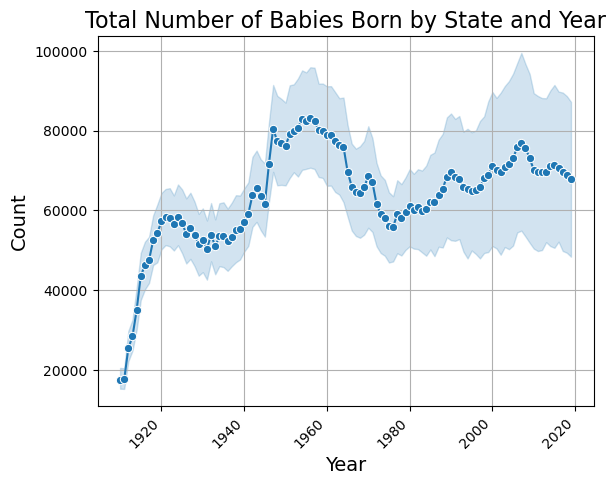

In [36]:
sns.lineplot(x='Year', y='Count', data=yearly_State_totals, marker='o')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.title('Total Number of Babies Born by State and Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)
plt.show()

Here, we ananlysis 6 states baby born situation.('GA', 'KY', 'NC', 'SC', 'TN', 'VA') From the selected state situation, we can predict the national cases. From the plot, it is evident that between 1910 and 1950, there were only minor fluctuations in the number of babies born. This relatively stable trend suggests that geographic influences on baby names during this period were minimal. However, from 1950 to 1990, noticeable variations in birth numbers across different states emerged. This indicates that cultural and regional differences may have started to influence the popularity of baby names.

Starting from 1990, a significant increase in the deviation of baby birth numbers is observed. Large states with higher birth rates are likely to have a substantial impact on the popularity of baby names, as their larger populations contribute more significantly to national trends.

Overall, the data suggest that while early 20th-century baby names were less influenced by regional factors, more recent decades have seen increased variability, reflecting the potenital growing impact of regional and cultural differences on naming trends.

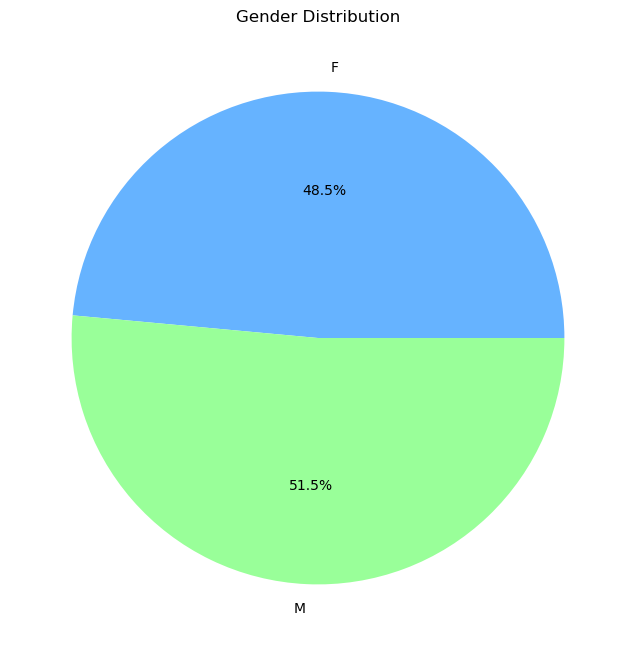

In [37]:
# Grouping by Gender
gender_counts = dataset2.groupby('Gender')['Count'].sum()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99'])
plt.title('Gender Distribution')
plt.show()

In these states, the male-to-female ratio is close to one; however, when analyzing the national gender ratio over the years, some intriguing patterns emerge. From 1910 to 1938, the birth rate of females was relatively higher compared to males. After 1938, the trend shifted, resulting in a higher birth rate of males. This suggests that the ratio of female to male births is highly time-dependent.

Given these observations, it is crucial to focus on the tendency of the gender ratio over time to understand the underlying dynamics better.

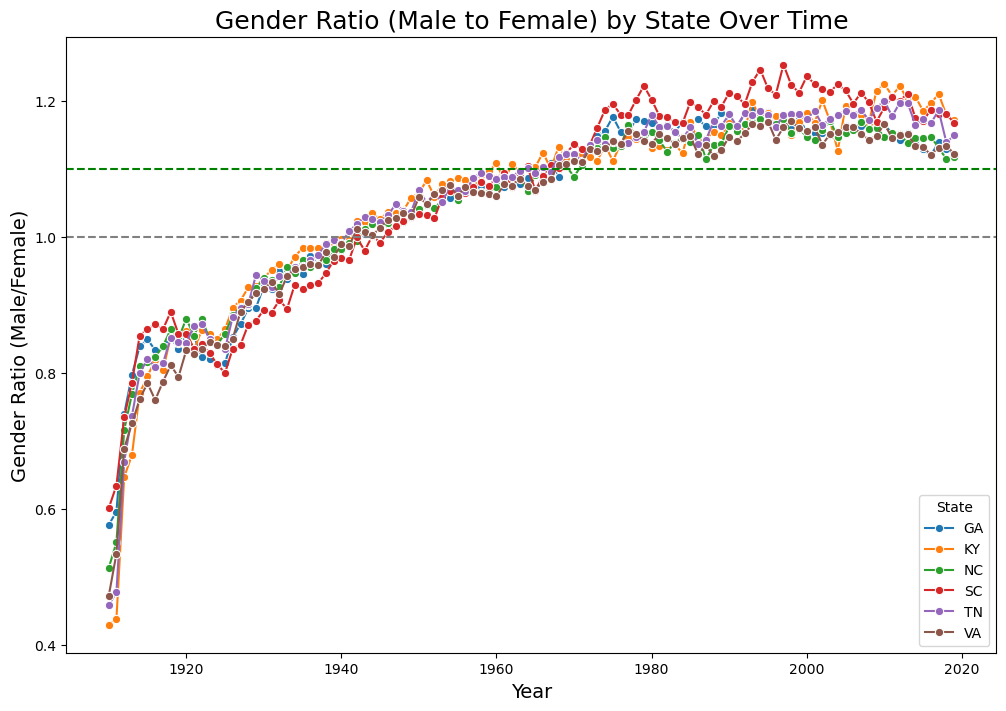

In [38]:
# Grouping by State, Year, and Gender, then summing the counts
grouped = dataset2.groupby(['State', 'Year', 'Gender'])['Count'].sum().unstack()

# Calculating the gender ratio (Male to Female)
grouped['Ratio'] = grouped['M'] / grouped['F']

# Resetting the index to convert it to a tidy DataFrame
ratio_data = grouped['Ratio'].reset_index()

# Plotting the lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(data=ratio_data, x='Year', y='Ratio', hue='State', marker='o')

plt.title('Gender Ratio (Male to Female) by State Over Time', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Gender Ratio (Male/Female)', fontsize=14)
plt.axhline(1, color='gray', linestyle='--') 
plt.axhline(1.1, color='green', linestyle='--') 
plt.legend(title='State')
plt.show()

Analyzing the Gender Ratio (Male to Female) by State Over Time reveals that the male ratio has been increasing since 1930. By 1970, the ratio reached approximately 1.2, significantly higher than the national average of 1.1. This indicates a substantial deviation between male and female names across the nation, suggesting that the popularity of names may be influenced by regional factors.

Furthermore, the states in question—Georgia (GA), Kentucky (KY), North Carolina (NC), South Carolina (SC), Tennessee (TN), and Virginia (VA)—are predominantly in the southern United States. Given this, we might expect a higher proportion of female births in northern regions.

In [39]:
# Filter the Data for 2019 and Male
filtered_male_dataset2 = dataset2[(dataset2['Year'] == 2019) & (dataset2['Gender'] == 'M')]

# Group by State and Name and sum the counts
grouped1 = filtered_male_dataset2.groupby(['State', 'Name'])['Count'].sum().reset_index()

# Sort and get the top 5 names for each state
top_10_male_names = grouped1.groupby('State').apply(lambda x: x.nlargest(10, 'Count')).reset_index(drop=True)


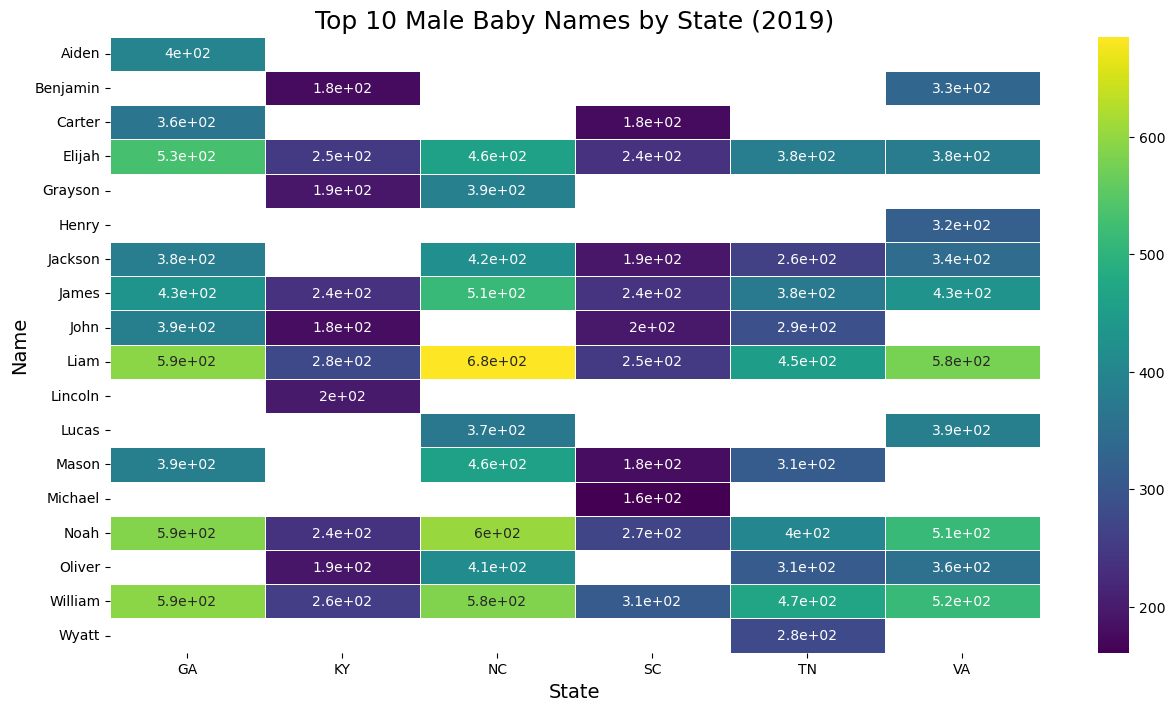

In [40]:
# Pivot the data to have states as columns, names as rows, and counts as values
heatmap_data1 = top_10_male_names.pivot(index='Name', columns='State', values='Count')

plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data1, annot=True, cmap='viridis', linewidths=.5)
plt.title('Top 10 Male Baby Names by State (2019)', fontsize=18)
plt.xlabel('State', fontsize=14)
plt.ylabel('Name', fontsize=14)
plt.show()

In the Top 10 Male Baby Names by State for 2019, some names, such as Elijah, James, Liam, Noah, and William, are popular across multiple states. In contrast, names like Wyatt and Lincoln are only popular in specific states. This pattern suggests a broader national trend in name preferences while also highlighting unique regional characteristics and tastes.

In [41]:
# Filter the Data for 2019 and Female
filtered_female_dataset2 = dataset2[(dataset2['Year'] == 2019) & (dataset2['Gender'] == 'F')]

# Group by State and Name and sum the counts
grouped2 = filtered_female_dataset2.groupby(['State', 'Name'])['Count'].sum().reset_index()

# Sort and get the top 5 names for each state
top_10_female_names = grouped2.groupby('State').apply(lambda x: x.nlargest(10, 'Count')).reset_index(drop=True)


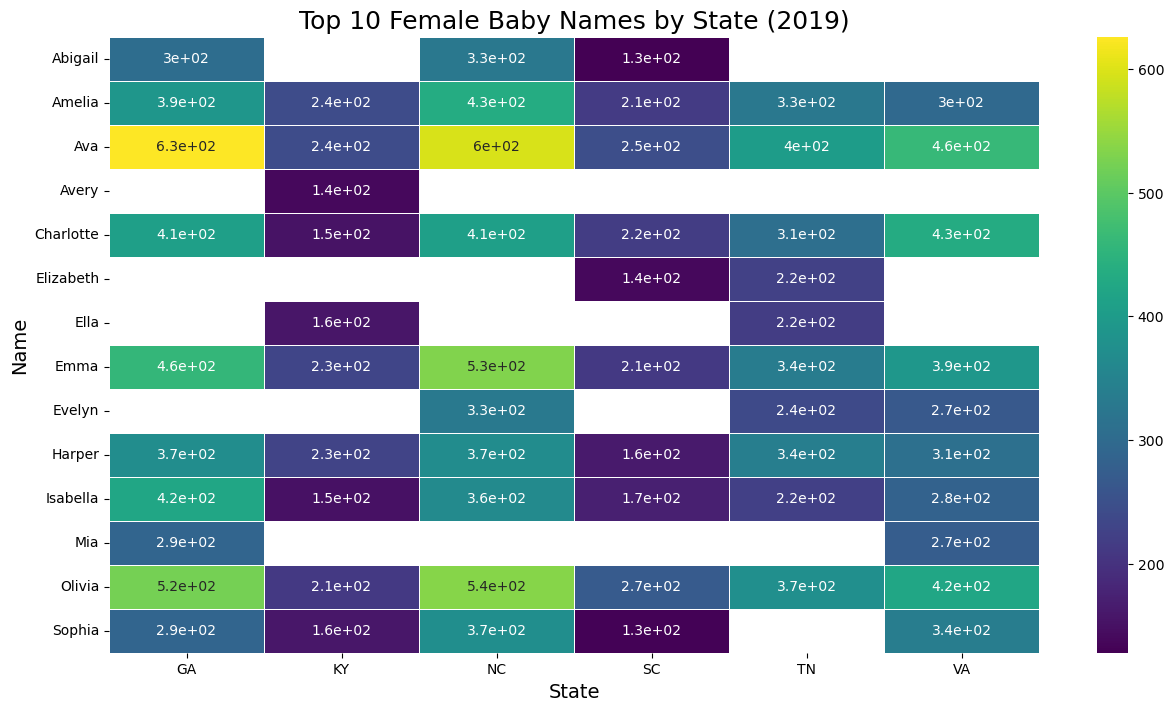

In [42]:
# Pivot the data to have states as columns, names as rows, and counts as values
heatmap_data2 = top_10_female_names.pivot(index='Name', columns='State', values='Count')


plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data2, annot=True, cmap='viridis', linewidths=.5)
plt.title('Top 10 Female Baby Names by State (2019)', fontsize=18)
plt.xlabel('State', fontsize=14)
plt.ylabel('Name', fontsize=14)
plt.show()

We also observe a similar trend in the top 10 popular names across states. By analyzing these patterns, we can predict popular names on a national scale while also appreciating the regional differences.

In [43]:
# DataFrame is sorted by Year and Rank
dataset3_sorted = dataset3.sort_values(['Year', 'Rank'])

# Group by Year and get the top 5 names for each year
top5_per_year = dataset3_sorted.groupby('Year').head(5).reset_index(drop=True)

# Display the result
print(top5_per_year)

     Rank       Name  Count Gender  Year
0       1       John   2205      M  1952
1       1  Christine   1346      F  1952
2       2      Peter   1903      M  1952
3       2      Susan   1170      F  1952
4       3     Robert   1787      M  1952
..    ...        ...    ...    ...   ...
355     1     Oliver    555      M  2023
356     1       Isla    403      F  2023
357     2       Noah    537      M  2023
358     2     Amelia    399      F  2023
359     3        Leo    409      M  2023

[360 rows x 5 columns]


In [44]:
# DataFrame is sorted by Year and Rank
dataset3_sorted = dataset3.sort_values(['Year', 'Rank'])

# Group by Year and get the top 5 names for each year
top1_per_year = dataset3_sorted.groupby('Year').head(1).reset_index(drop=True)

print(top1_per_year)

    Rank    Name  Count Gender  Year
0      1    John   2205      M  1952
1      1    John   2148      M  1953
2      1   Peter   2097      M  1954
3      1   Peter   2312      M  1955
4      1   Peter   2796      M  1956
..   ...     ...    ...    ...   ...
67     1  Oliver    641      M  2019
68     1  Oliver    637      M  2020
69     1  Oliver    695      M  2021
70     1    Noah    630      M  2022
71     1  Oliver    555      M  2023

[72 rows x 5 columns]


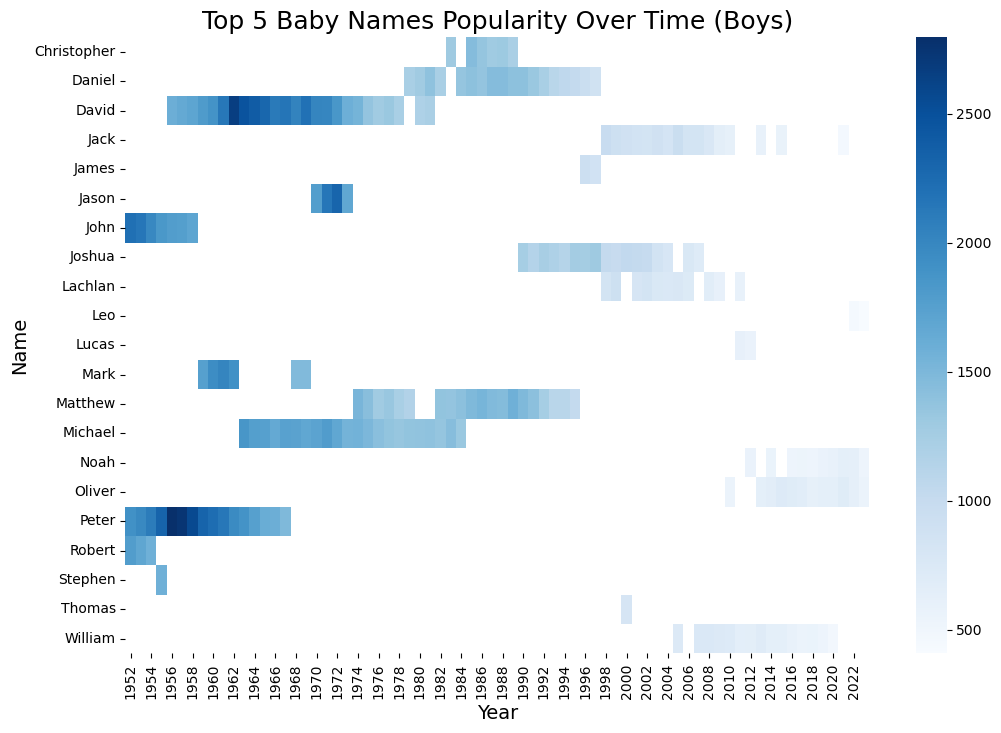

In [45]:
# Sort and get the top 5 names per year (this would be done already)
dataset3_sorted = dataset3.sort_values(['Year', 'Rank'])
top5_per_year = dataset3_sorted.groupby('Year').head(5).reset_index(drop=True)

# Separate the data by gender
boys_data = top5_per_year[top5_per_year['Gender'] == 'M']
girls_data = top5_per_year[top5_per_year['Gender'] == 'F']

# Pivot the data for boys
pivot_boys = boys_data.pivot_table(values='Count', index='Name', columns='Year', aggfunc=np.sum)

# Pivot the data for girls
pivot_girls = girls_data.pivot_table(values='Count', index='Name', columns='Year', aggfunc=np.sum)


# Plot the heatmap for boys
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_boys, cmap="Blues")
plt.title('Top 5 Baby Names Popularity Over Time (Boys)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Name', fontsize=14)
plt.show()

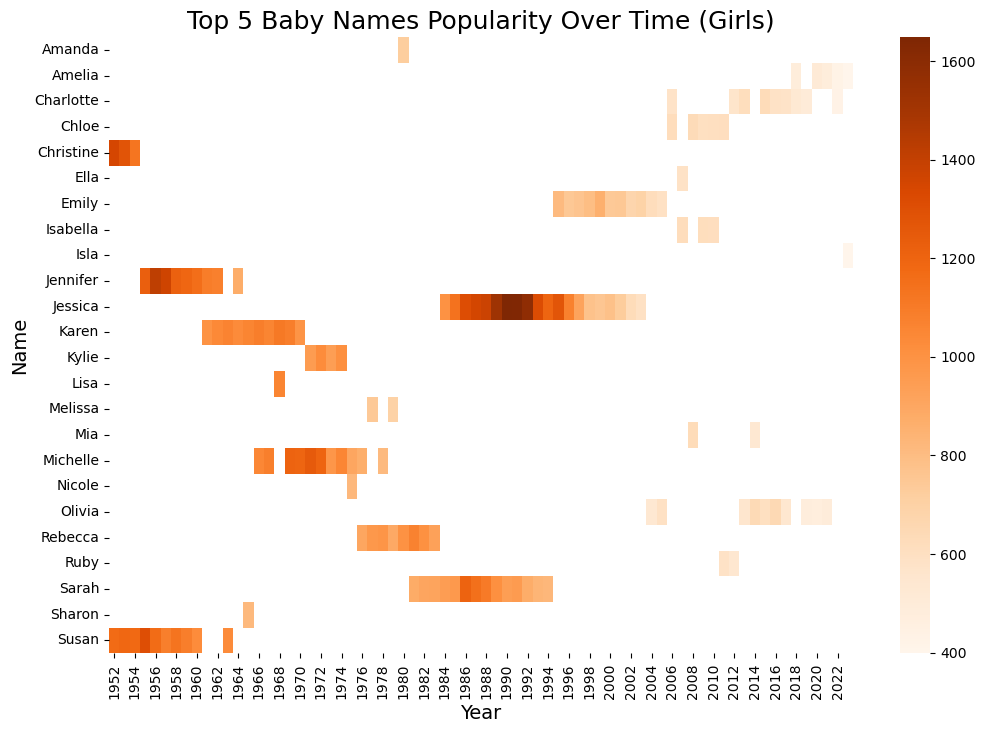

In [46]:
# Plot the heatmap for girls
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_girls, cmap="Oranges")
plt.title('Top 5 Baby Names Popularity Over Time (Girls)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Name', fontsize=14)
plt.show()

From the heatmaps of the top 5 baby names' popularity over time for boys and girls, we can clearly observe that some names maintain popularity for several years, while others experience only brief periods of popularity. Additionally, when we consider the broader data, we see that the number of newborns has significantly increased, especially after 2000. However, the counts for the top names have decreased, suggesting that parents are choosing a wider variety of names, indicating a trend toward greater diversity in naming.

The popularity of names often reflects cultural, social, and generational shifts. Names that were once common, like Peter, David, and Susan, have seen a decline in use, which suggests that these names may now be perceived as outdated or old-fashioned. This trend is not uncommon, as names often cycle in and out of favor over time. For instance, names like Peter and David were extremely popular in the mid-20th century but have become less common in recent decades. Similarly, Susan, which was once a top choice for girls, has also seen a decline. These shifts could be due to a variety of factors, such as parents seeking more modern or unique names, or cultural associations with certain eras. In contrast, some names, like Olivia, have either maintained or gained popularity in recent years. Olivia, for example, was not as common in earlier decades but has become one of the most popular names for girls today. This could be due to its pleasant sound, association with popular culture, or simply because it aligns with current naming trends.


To better understand these trends, we could analyze historical data on baby names to track the rise and fall of names like Peter, William, Susan, and Olivia. This would give us insights into how naming conventions have evolved and which names have remained or become popular over time.


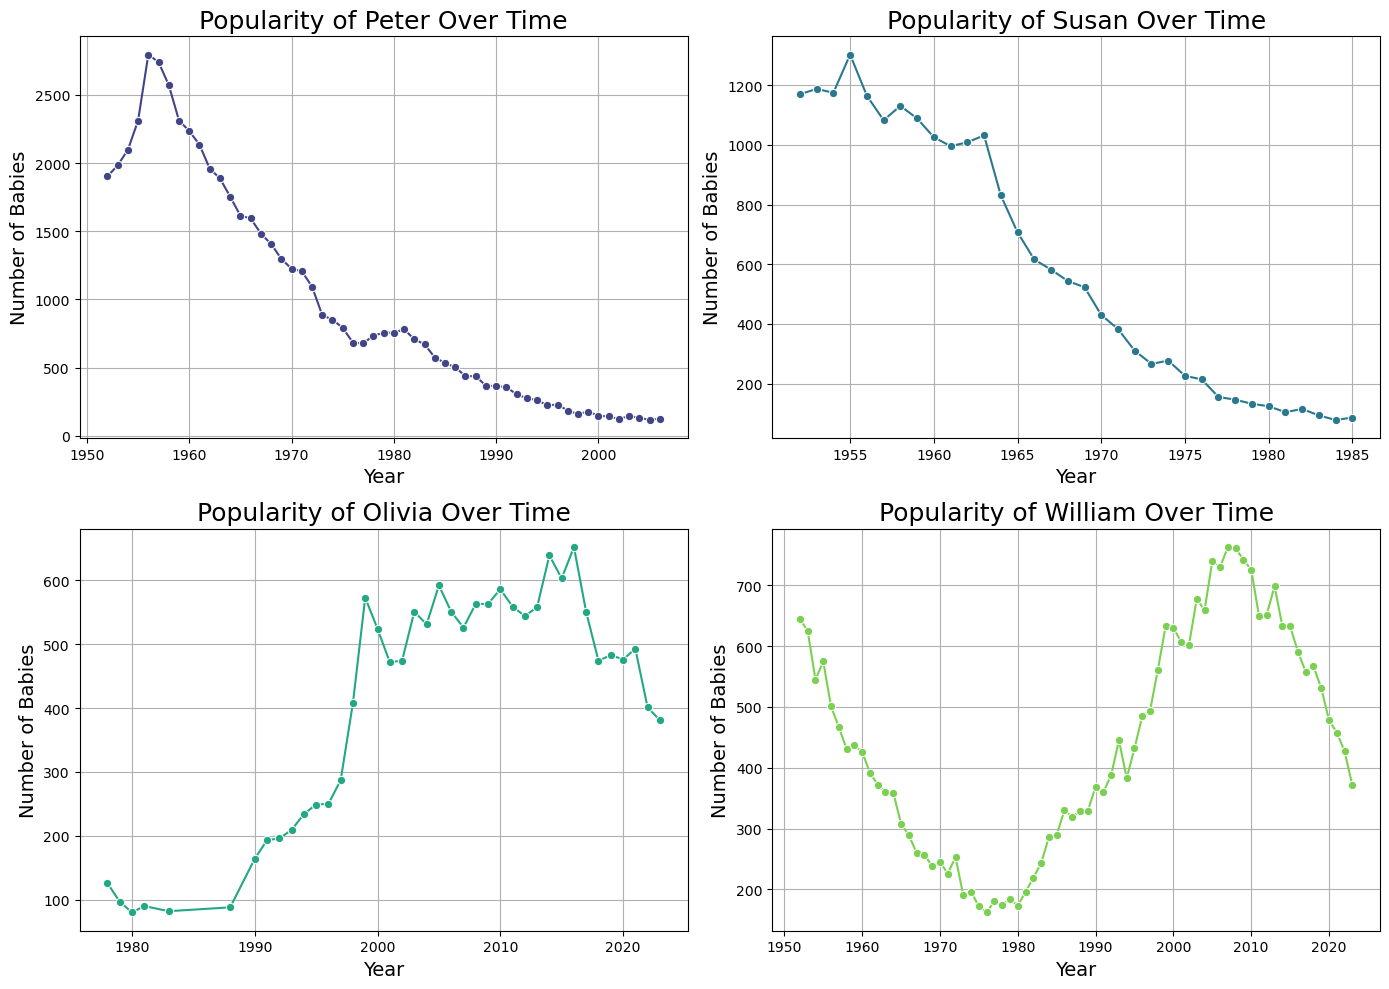

In [47]:
names_to_plot = ['Peter', 'Susan', 'Olivia', 'William']
filtered_data = dataset3[dataset3['Name'].isin(names_to_plot)]

# Initialize the subplot grid (2 rows x 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Define a color palette for consistency
palette = sns.color_palette("viridis", len(names_to_plot))

# Plot each name in a separate subplot
for i, name in enumerate(names_to_plot):
    name_data = filtered_data[filtered_data['Name'] == name]
    sns.lineplot(x='Year', y='Count', data=name_data, ax=axs[i], color=palette[i], marker='o')
    axs[i].set_title(f'Popularity of {name} Over Time', fontsize=18)
    axs[i].set_xlabel('Year', fontsize=14)
    axs[i].set_ylabel('Number of Babies', fontsize=14)
    axs[i].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

From the plots, we can observe that names that were once extremely popular, such as Peter and Susan, have significantly declined in usage. For instance, Susan has not been in the Top 100 names since 1985, while Peter, although still in the Top 100, has seen a substantial decrease in popularity. Conversely, names that were less common in the past, like Oliver, have surged in popularity in recent years. Olivia has been in the Top 100 since 1975 and reached particularly high rankings from 2000 to 2022. Names with moderate historical usage, such as William, exhibit a fluctuating trend with periods of both rising and falling popularity. Therefore, examining the proportion of a name's usage relative to the total number of births could be crucial for further research, especially in predicting future naming trends.

## 4.  Advanced Analysis

In [48]:
# Step 1: Calculate the total number of births per year
total_baby_per_year = dataset1.groupby(['Year'])['Count'].sum().reset_index()
total_baby_per_year.columns = ['Year', 'Total_Births']

# Step 2: Calculate the total number of births per gender per year
total_births_per_gender_year = dataset1.groupby(['Year', 'Gender'])['Count'].sum().reset_index()
total_births_per_gender_year.columns = ['Year', 'Gender', 'Total_Gender_Births']

# Step 3: Merge the total births (overall) with the original dataset
data = pd.merge(dataset1, total_baby_per_year, on='Year')

# Step 4: Merge the total gender births with the dataset to calculate the gender-specific ratio
data = pd.merge(data, total_births_per_gender_year, on=['Year', 'Gender'])

# Step 5: Calculate the Permille Name_Ratio and Gender_Name_Ratio
data['Name_Ratio'] = data['Count'] / data['Total_Births']*1000
data['Gender_Name_Ratio'] = data['Count'] / data['Total_Gender_Births']*1000

# Step 6: Create a new DataFrame with the required columns
name_ratio_df = data[['Name', 'Year', 'Gender', 'Count', 'Name_Ratio', 'Gender_Name_Ratio']]

# Display the new DataFrame
print(name_ratio_df)

            Name  Year Gender  Count  Name_Ratio  Gender_Name_Ratio
0          Emily  2000      F  25959    6.867840          14.295257
1         Hannah  2000      F  23086    6.107745          12.713136
2        Madison  2000      F  19968    5.282832          10.996097
3         Ashley  2000      F  17998    4.761639           9.911246
4          Sarah  2000      F  17713    4.686238           9.754300
...          ...   ...    ...    ...         ...                ...
2117214   Zyheem  2019      M      5    0.001441           0.002790
2117215    Zykel  2019      M      5    0.001441           0.002790
2117216   Zyking  2019      M      5    0.001441           0.002790
2117217      Zyn  2019      M      5    0.001441           0.002790
2117218    Zyran  2019      M      5    0.001441           0.002790

[2117219 rows x 6 columns]


In [49]:
# Save DataFrame to data.csv
name_ratio_df.to_csv('data.csv')

# Display the first few rows to verify
print(name_ratio_df.head())

      Name  Year Gender  Count  Name_Ratio  Gender_Name_Ratio
0    Emily  2000      F  25959    6.867840          14.295257
1   Hannah  2000      F  23086    6.107745          12.713136
2  Madison  2000      F  19968    5.282832          10.996097
3   Ashley  2000      F  17998    4.761639           9.911246
4    Sarah  2000      F  17713    4.686238           9.754300


### **4.1.1** Popular Name via Count

In [50]:
# Function to get the top names by total count for each gender and area
def get_top_names_counts(data, gender, top_n=5):
    gender_data = data[data['Gender'] == gender]
    name_counts = gender_data.groupby('Name')['Count'].sum().sort_values(ascending=False)
    return name_counts.head(top_n).index.tolist()


# Get top 5 female and male names in Nation
top_female_names_counts = get_top_names_counts(name_ratio_df, 'F')
top_male_names_counts = get_top_names_counts(name_ratio_df, 'M')
print (top_female_names_counts)
print (top_male_names_counts)

['Mary', 'Elizabeth', 'Patricia', 'Jennifer', 'Linda']
['James', 'John', 'Robert', 'Michael', 'William']


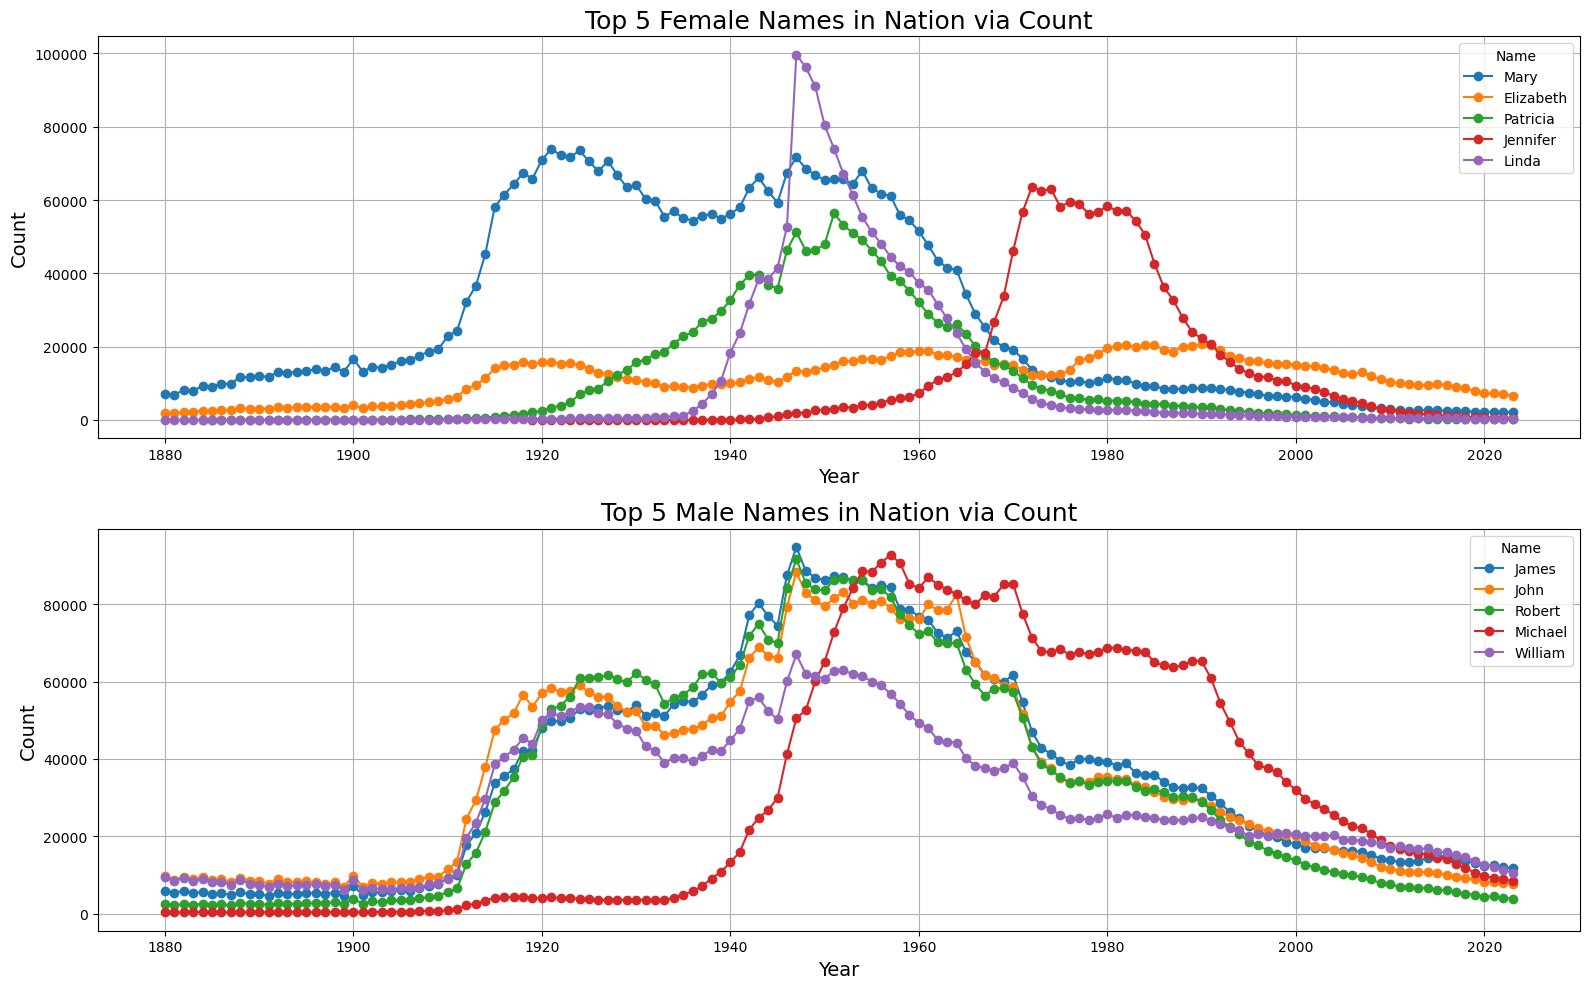

In [51]:
# Sort the dataset by Year
name_ratio_df = name_ratio_df.sort_values(by=['Year'])
plt.figure(figsize=(16, 10))

# Plot for top 5 female names
plt.subplot(2, 1, 1)
for name in top_female_names_counts:
    name_data = name_ratio_df[(name_ratio_df['Name'] == name) & (name_ratio_df['Gender'] == 'F')]
    plt.plot(name_data['Year'], name_data['Count'], marker='o', label=name)
plt.title('Top 5 Female Names in Nation via Count', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Name')
plt.grid(True)

# Plot for top 5 male names
plt.subplot(2, 1, 2)
for name in top_male_names_counts:
    name_data = name_ratio_df[(name_ratio_df['Name'] == name) & (name_ratio_df['Gender'] == 'M')]
    plt.plot(name_data['Year'], name_data['Count'], marker='o', label=name)
plt.title('Top 5 Male Names in Nation via Count', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Name')
plt.grid(True)

plt.tight_layout()
plt.show()

From the plot, it's evident that the top 5 popular female and male names were consistently used before 2000. However, in the past 24 years, these names have lost prominence, with their usage declining significantly since 2000. This shift suggests the need to focus on emerging popular names among the new generation.

Additionally, given the time-related changes in birth numbers, we anticipate variations in popular baby names over time, influenced by both evolving naming trends and shifts in gender ratios. Further analysis should address both aspects to gain a comprehensive understanding of these trends.

### **4.1.2** Popular Name via National Permill

In [52]:
# Function to get the top names by total name ratio for each gender and area
def get_top_names_nation_ratio(data, gender, top_n=5):
    gender_data = data[data['Gender'] == gender]
    name_counts = gender_data.groupby('Name')['Name_Ratio'].sum().sort_values(ascending=False)
    return name_counts.head(top_n).index.tolist()

# Get top 5 female and male names in Nation
top_female_names_ratio = get_top_names_nation_ratio(name_ratio_df, 'F')
top_male_names_ratio = get_top_names_nation_ratio(name_ratio_df, 'M')
print (top_female_names_ratio)
print (top_male_names_ratio)

['Mary', 'Elizabeth', 'Margaret', 'Helen', 'Anna']
['John', 'James', 'William', 'Robert', 'Michael']


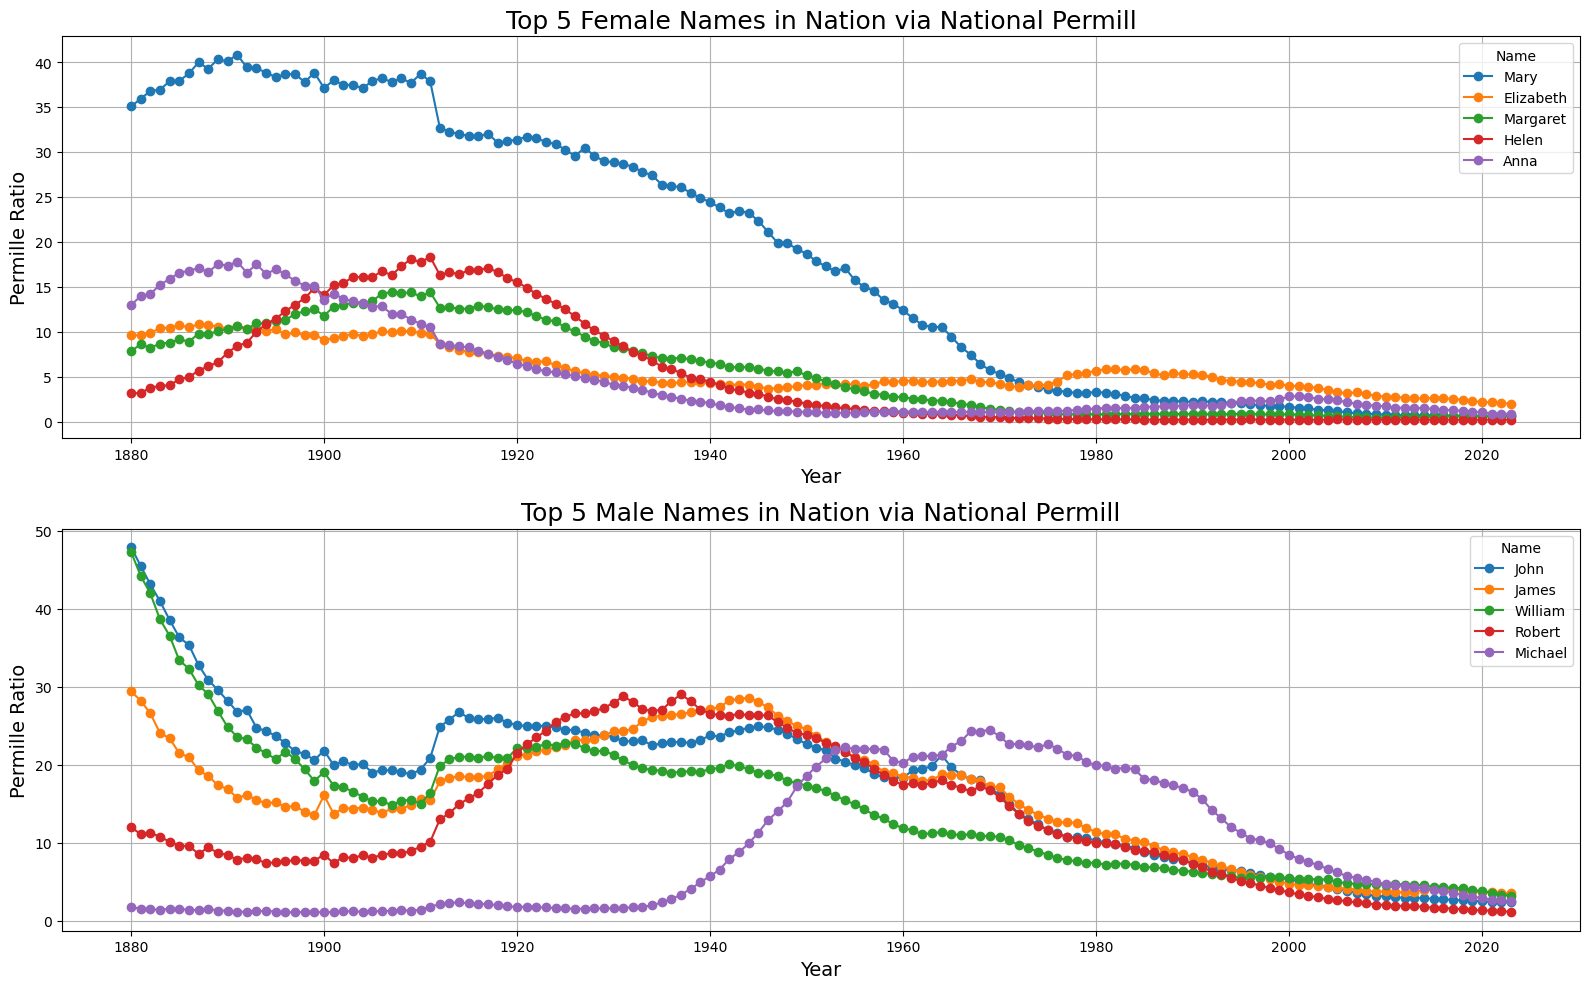

In [53]:
plt.figure(figsize=(16, 10))

# Plot for top 5 female names
plt.subplot(2, 1, 1)
for name in top_female_names_ratio:
    name_data = name_ratio_df[(name_ratio_df['Name'] == name) & (name_ratio_df['Gender'] == 'F')]
    plt.plot(name_data['Year'], name_data['Name_Ratio'], marker='o', label=name)
plt.title('Top 5 Female Names in Nation via National Permill', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Permille Ratio', fontsize=14)
plt.legend(title='Name')
plt.grid(True)

# Plot for top 5 male names
plt.subplot(2, 1, 2)
for name in top_male_names_ratio:
    name_data = name_ratio_df[(name_ratio_df['Name'] == name) & (name_ratio_df['Gender'] == 'M')]
    plt.plot(name_data['Year'], name_data['Name_Ratio'], marker='o', label=name)
plt.title('Top 5 Male Names in Nation via National Permill', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Permille Ratio', fontsize=14)
plt.legend(title='Name')
plt.grid(True)

plt.tight_layout()
plt.show()

When analyzing popular baby names, it's evident that trends emerge when we consider the number of babies born with each name over time. In the top 5 female baby names, only two have consistently remained in the top 5, yet all of them continue to be popular choices among parents. This underscores the importance of considering the actual number of babies named when assessing trends.

For male baby names, the top 5 based on the national baby ratio closely resemble the top 5 derived from simple counts, but the trends become clearer when analyzed in this way. Specifically, female baby names that dominated from 1880 to 1960 are more apparent, while the top 4 male baby names held sway from 1880 to 1970. From 1960 to 2000, we observe a shift in preferences for both male and female baby names. This analysis reveals that certain names are widely used during specific periods. Considering both the number of babies born with each name and the gender ratio provides valuable insights into the popularity and evolution of baby names over time.

### **4.1.3** Popular Name via National Gender Permill

In [54]:
# Function to get the top names by total name gender ratio
def get_top_names_gender_ratio(data, gender, top_n=5):
    gender_data = data[data['Gender'] == gender]
    name_counts = gender_data.groupby('Name')['Gender_Name_Ratio'].sum().sort_values(ascending=False)
    return name_counts.head(top_n).index.tolist()

# Get top 5 female and male names in Nation
top_female_names_gender_ratio = get_top_names_gender_ratio(name_ratio_df, 'F')
top_male_names_gender_ratio = get_top_names_gender_ratio(name_ratio_df, 'M')
print (top_female_names_gender_ratio)
print (top_male_names_gender_ratio)

['Mary', 'Elizabeth', 'Margaret', 'Anna', 'Helen']
['John', 'James', 'William', 'Robert', 'Charles']


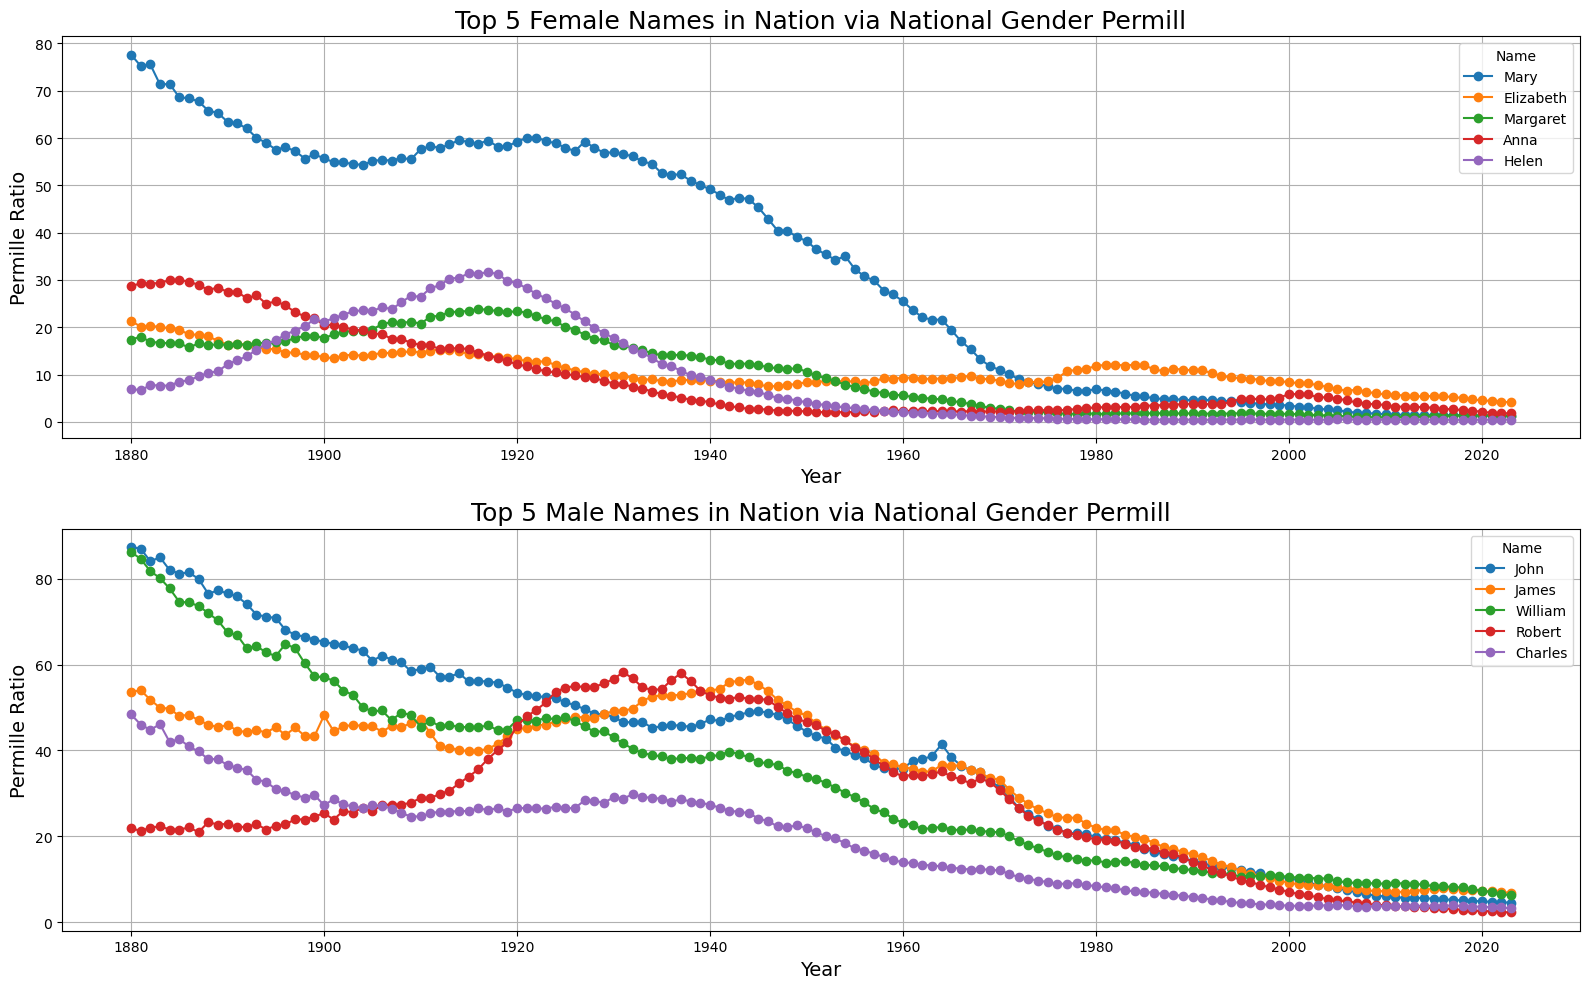

In [55]:
plt.figure(figsize=(16, 10))

# Plot for top 5 female names
plt.subplot(2, 1, 1)
for name in top_female_names_gender_ratio:
    name_data = name_ratio_df[(name_ratio_df['Name'] == name) & (name_ratio_df['Gender'] == 'F')]
    plt.plot(name_data['Year'], name_data['Gender_Name_Ratio'], marker='o', label=name)
plt.title('Top 5 Female Names in Nation via National Gender Permill', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Permille Ratio', fontsize=14)
plt.legend(title='Name')
plt.grid(True)

# Plot for top 5 male names
plt.subplot(2, 1, 2)
for name in top_male_names_gender_ratio:
    name_data = name_ratio_df[(name_ratio_df['Name'] == name) & (name_ratio_df['Gender'] == 'M')]
    plt.plot(name_data['Year'], name_data['Gender_Name_Ratio'], marker='o', label=name)
plt.title('Top 5 Male Names in Nation via National Gender Permill', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Permille Ratio', fontsize=14)
plt.legend(title='Name')
plt.grid(True)

plt.tight_layout()
plt.show()

When further analyzing the influence of gender ratios on baby name choices, we can see that the ratio of names can be regarded as an indicator of the likelihood that parents will choose a particular name for their babies. For female baby names, an interesting observation is that the name Elizabeth has shown consistent popularity over time. This name seems timeless, possibly due to the influence of figures like Queen Elizabeth.

Regarding the trend in popular male names, it's clear that the top 5 names dominated from 1880 to 1970, which reinforces the idea that baby name trends evolve over time. By considering gender ratios and historical trends, we can gain deeper insights into how and why certain baby names maintain their popularity across generations.

When analyzing baby names using three different methods—gender ratio, national ratio, and count—we can derive distinct insights. The gender ratio method is particularly useful for predicting future baby name trends and understanding how widely a name is used across different genders. The national ratio method, on the other hand, is more practical for commercial purposes. When selling name-related products, such as personalized items, considering the national ratio allows for a more targeted approach, ensuring that the most popular names in specific regions or demographics are prioritized. The count method, which simply looks at the total number of babies given a particular name, is valuable for understanding the overall historical popularity of names. This method helps in analyzing cultural significance, historical prevalence, and general trends over time.

### **4.2.1** Popular Baby Name after 2000

In [56]:
# Function to get the top names by total gender name ratio after the year 2000
def get_top_names_gender_ratio(data, gender, top_n=10):
    # Filter data for the specified gender and for years after 2000
    gender_data = data[(data['Gender'] == gender) & (data['Year'] > 2000)]
    gender_name_ratio_sum = gender_data.groupby('Name')['Gender_Name_Ratio'].sum().sort_values(ascending=False)
    return gender_name_ratio_sum.head(top_n).index.tolist()

# Function to get the top names by total national name ratio after the year 2000
def get_top_names_name_ratio(data, gender, top_n=10):
    # Filter data for the specified gender and for years after 2000
    gender_data = data[(data['Gender'] == gender) & (data['Year'] > 2000)]
    
    national_name_ratio_sum = gender_data.groupby('Name')['Name_Ratio'].sum().sort_values(ascending=False)
    
    return national_name_ratio_sum.head(top_n).index.tolist()

# Function to get the top names by total name count after the year 2000
def get_top_names_name_count(data, gender, top_n=10):
    # Filter data for the specified gender and for years after 2000
    gender_data = data[(data['Gender'] == gender) & (data['Year'] > 2000)]
    
    name_count_sum = gender_data.groupby('Name')['Count'].sum().sort_values(ascending=False)

    return name_count_sum.head(top_n).index.tolist()

# Get top 10 female and male names by gender ratio after year 2000
top_female_names_gender_ratio = get_top_names_gender_ratio(name_ratio_df, 'F')
top_male_names_gender_ratio = get_top_names_gender_ratio(name_ratio_df, 'M')

# Get top 10 female and male names by national ratio after year 2000
top_female_names_national_ratio = get_top_names_name_ratio(name_ratio_df, 'F')
top_male_names_national_ratio = get_top_names_name_ratio(name_ratio_df, 'M')

# Get top 10 female and male names by name count after year 2000
top_female_names_count = get_top_names_name_count(name_ratio_df, 'F')
top_male_names_count = get_top_names_name_count(name_ratio_df, 'M')

# Print the results
print("\nPopular Female Baby Names by Gender Permille Ratio After 2000:")
print(top_female_names_gender_ratio)
print("\nPopular Male Baby Names by Gender Permille Ratio After 2000:")
print(top_male_names_gender_ratio)

print("\nPopular Female Baby Names by National Permille Ratio After 2000:")
print(top_female_names_national_ratio)
print("\nPopular Male Baby Names by National Permille Ratio After 2000:")
print(top_male_names_national_ratio)

print("\nPopular Female Baby Names by Name Counting After 2000:")
print(top_female_names_count)
print("\nPopular Male Baby Names by Name Counting After 2000:")
print(top_male_names_count)



Popular Female Baby Names by Gender Permille Ratio After 2000:
['Emma', 'Olivia', 'Isabella', 'Sophia', 'Emily', 'Ava', 'Madison', 'Abigail', 'Mia', 'Elizabeth']

Popular Male Baby Names by Gender Permille Ratio After 2000:
['Jacob', 'Michael', 'Noah', 'William', 'Ethan', 'Daniel', 'Matthew', 'Alexander', 'James', 'Joshua']

Popular Female Baby Names by National Permille Ratio After 2000:
['Emma', 'Olivia', 'Isabella', 'Sophia', 'Emily', 'Ava', 'Madison', 'Abigail', 'Mia', 'Elizabeth']

Popular Male Baby Names by National Permille Ratio After 2000:
['Jacob', 'Michael', 'Noah', 'William', 'Ethan', 'Daniel', 'Matthew', 'Alexander', 'James', 'Joshua']

Popular Female Baby Names by Name Counting After 2000:
['Emma', 'Olivia', 'Isabella', 'Sophia', 'Emily', 'Ava', 'Madison', 'Abigail', 'Mia', 'Elizabeth']

Popular Male Baby Names by Name Counting After 2000:
['Jacob', 'Michael', 'Noah', 'William', 'Ethan', 'Daniel', 'Matthew', 'Alexander', 'James', 'Joshua']


After the year 2000, the differences among the top 10 baby names across the three methods—Count, National Ratio, and Gender Ratio—become less pronounced. This convergence is likely due to the relatively stable number of births and the consistent female-to-male ratio during this period.

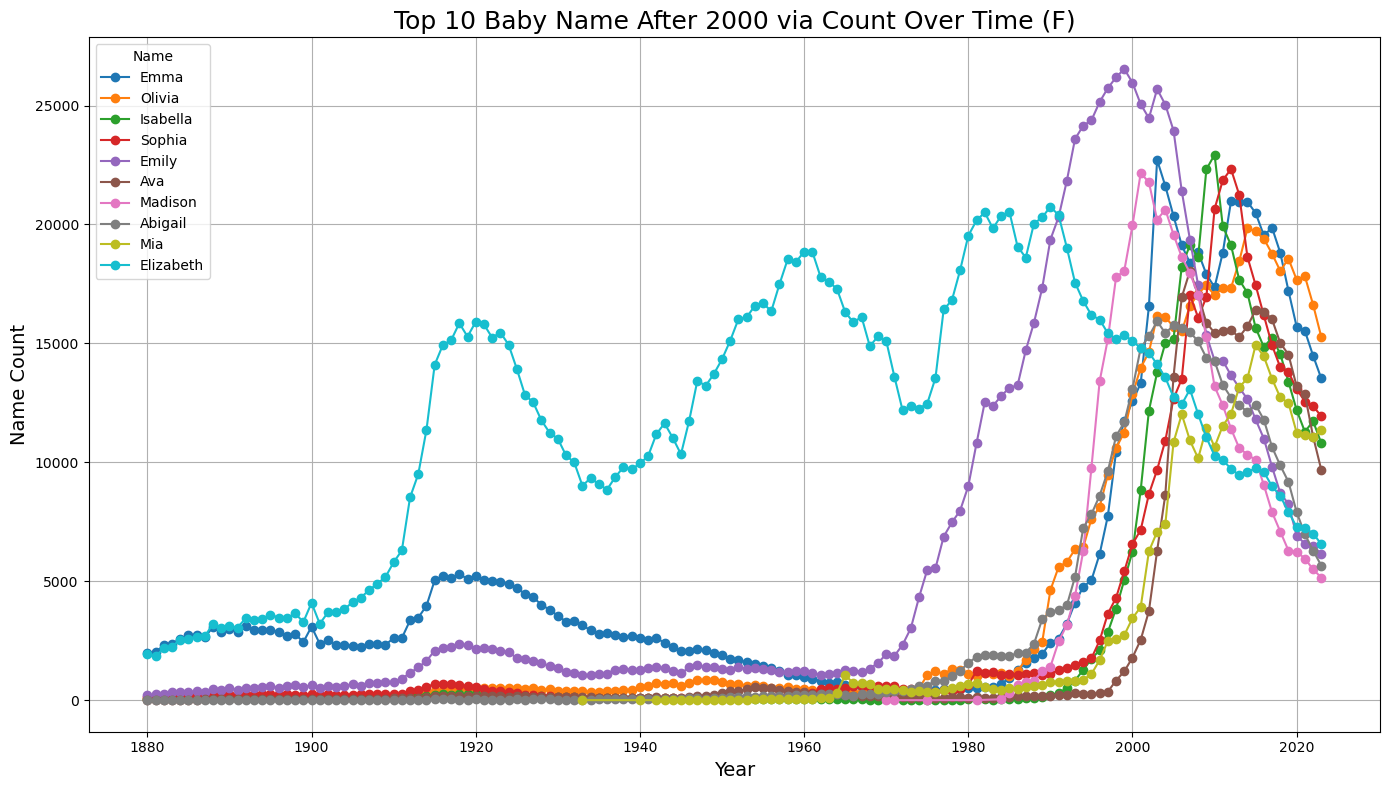

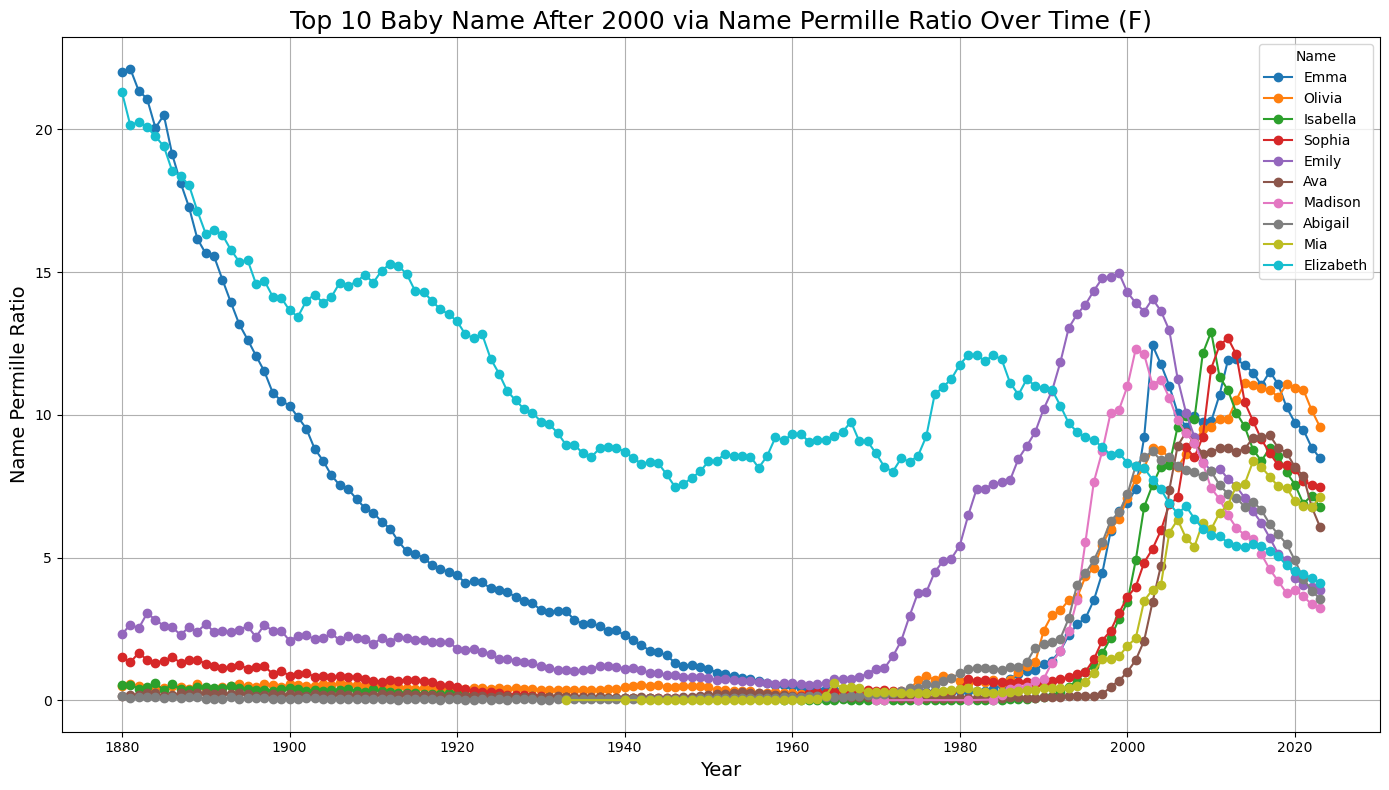

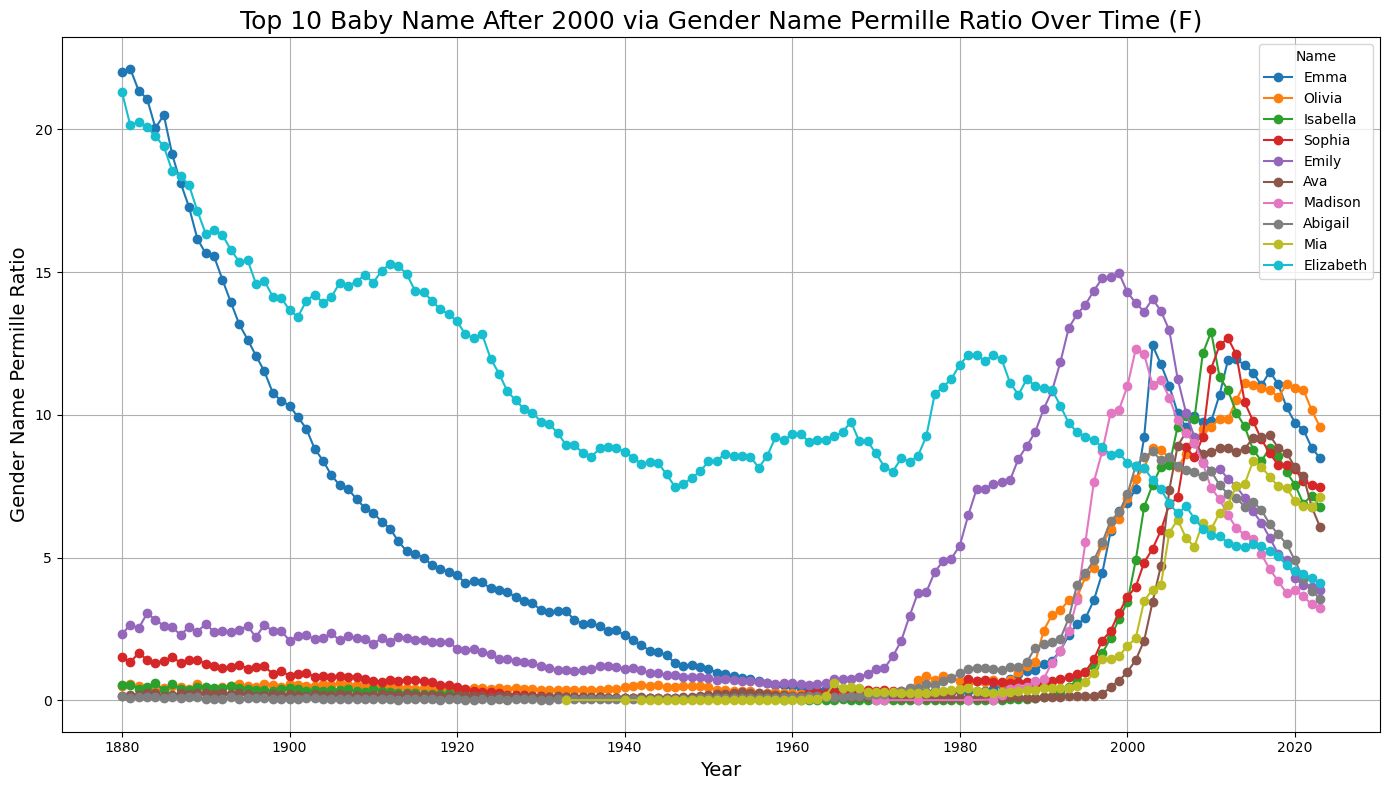

In [57]:
# Function to plot name metrics over time
def plot_name_trend(data, names, metric, gender, title, ylabel):
    plt.figure(figsize=(14, 8))

    for name in names:
        name_data = data[(data['Name'] == name) & (data['Gender'] == gender)]
        plt.plot(name_data['Year'], name_data[metric], marker='o', label=name)

    plt.title(f'{title} Over Time ({gender})', fontsize=18)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.legend(title='Name')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Names to plot (you can choose from the top names calculated earlier)
names_to_plot = top_female_names_gender_ratio  

# Plotting Name Count over Time
plot_name_trend(name_ratio_df, names_to_plot, 'Count', 'F', 'Top 10 Baby Name After 2000 via Count', 'Name Count')

# Plotting Gender Name Ratio over Time
plot_name_trend(name_ratio_df, names_to_plot, 'Gender_Name_Ratio', 'F', 'Top 10 Baby Name After 2000 via Name Permille Ratio', 'Name Permille Ratio')

# Plotting Gender Name Ratio over Time
plot_name_trend(name_ratio_df, names_to_plot, 'Gender_Name_Ratio', 'F', 'Top 10 Baby Name After 2000 via Gender Name Permille Ratio', 'Gender Name Permille Ratio')


Previous studies have shown that names tend to have cycles of popularity, often becoming trendy for a certain period before fading. Analyzing the popularity of names in recent years is crucial to understanding these trends. When we look at the top 10 female baby names after the year 2000, it's evident that many of these names did not enjoy the same level of popularity in the past. This shift highlights how naming trends evolve over time, reflecting cultural, social, and even media influences. By examining these patterns, we can gain insights into the factors that drive the popularity of certain names at specific points in history.

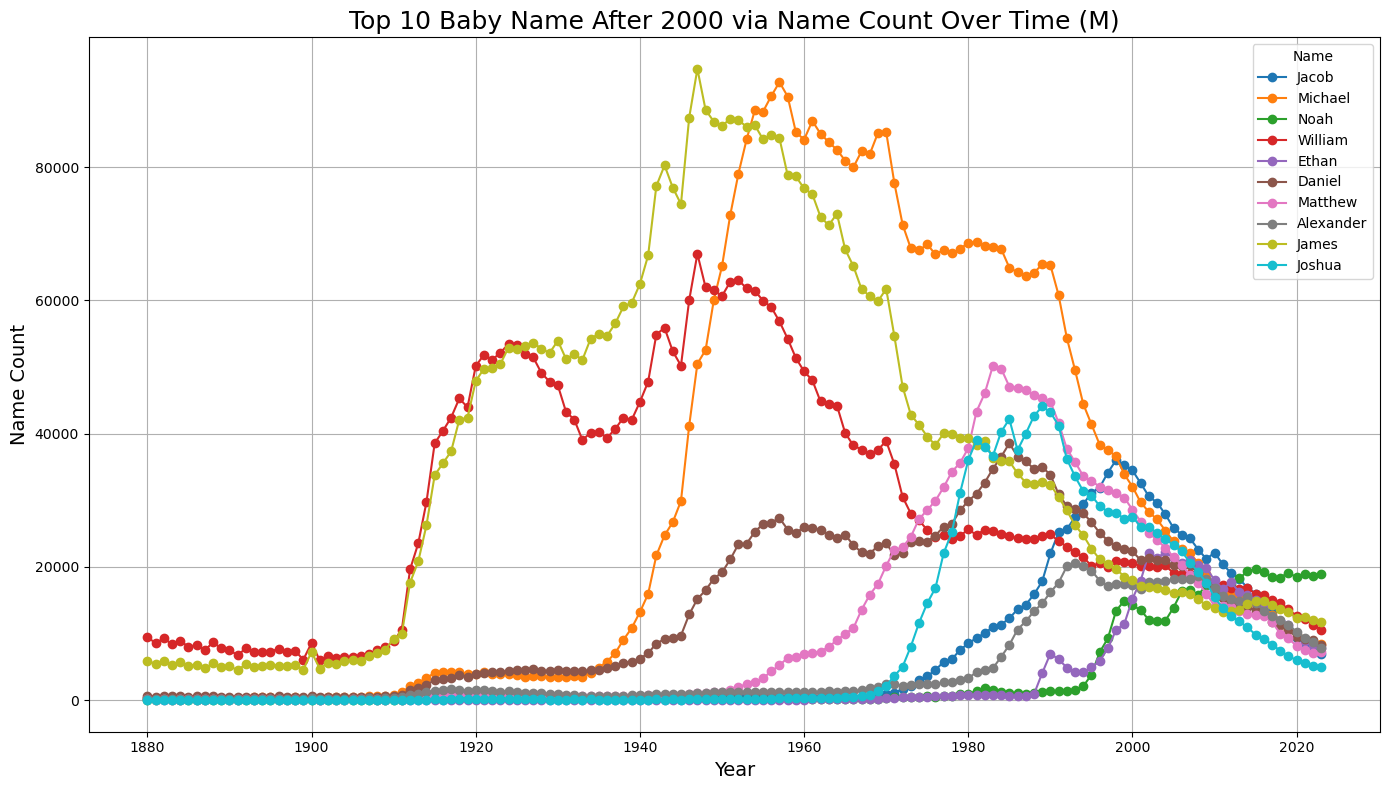

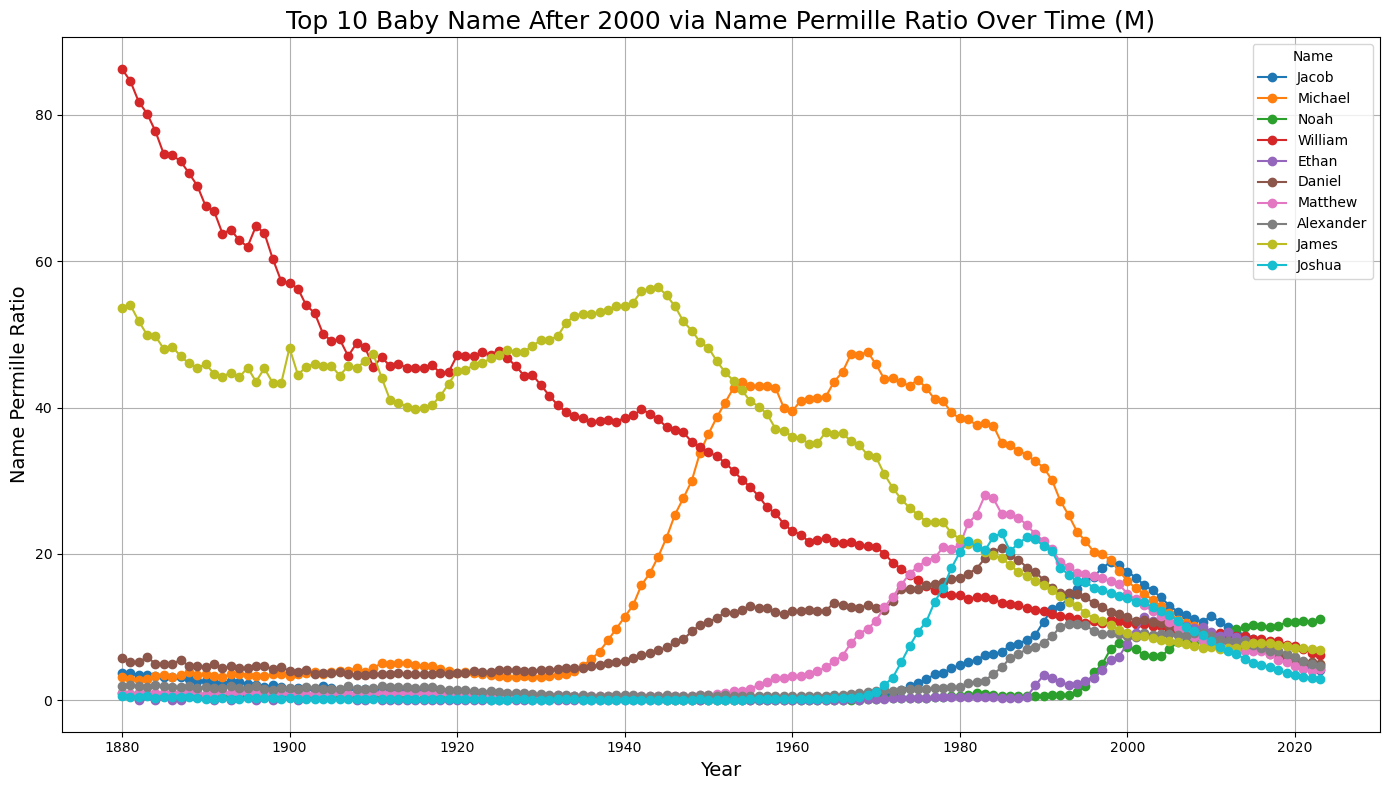

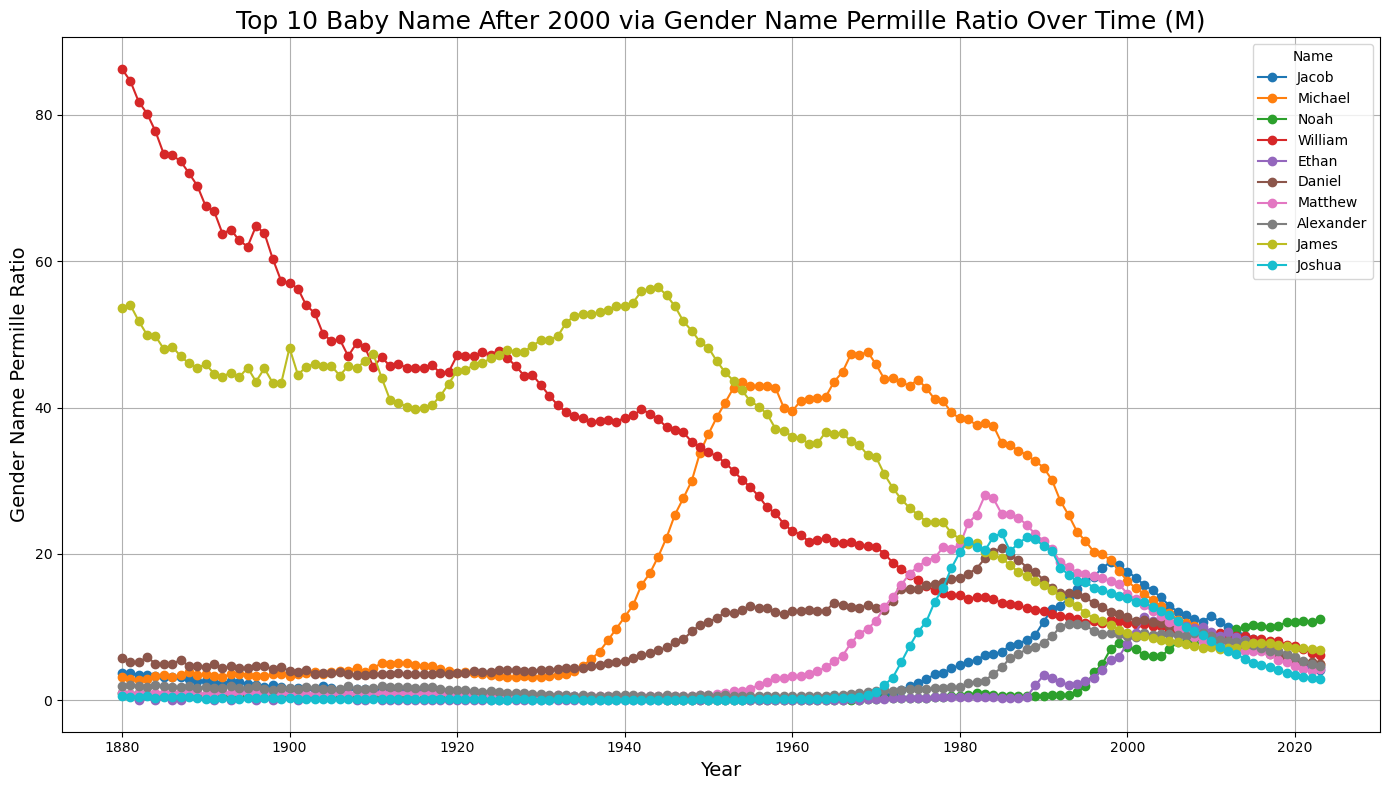

In [58]:
# Function to plot name metrics over time
def plot_name_trend(data, names, metric, gender, title, ylabel):
    plt.figure(figsize=(14, 8))

    for name in names:
        name_data = data[(data['Name'] == name) & (data['Gender'] == gender)]
        plt.plot(name_data['Year'], name_data[metric], marker='o', label=name)

    plt.title(f'{title} Over Time ({gender})', fontsize=18)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.legend(title='Name')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Names to plot (you can choose from the top names calculated earlier)
names_to_plot = top_male_names_gender_ratio  

# Plotting Name Count over Time
plot_name_trend(name_ratio_df, names_to_plot, 'Count', 'M', 'Top 10 Baby Name After 2000 via Name Count', 'Name Count')
# Plotting Gender Name Ratio over Time
plot_name_trend(name_ratio_df, names_to_plot, 'Gender_Name_Ratio', 'M', 'Top 10 Baby Name After 2000 via Name Permille Ratio', 'Name Permille Ratio')
# Plotting Gender Name Ratio over Time
plot_name_trend(name_ratio_df, names_to_plot, 'Gender_Name_Ratio', 'M', 'Top 10 Baby Name After 2000 via Gender Name Permille Ratio', 'Gender Name Permille Ratio')


From the top 10 male names after 2000, we observe that names like William and James have maintained their popularity over time. However, the rest of the names on the list were not as popular in the past. This suggests a trend where previously less common names are now gaining popularity. This shift could be influenced by various factors, including changing cultural preferences and the desire for unique or modern-sounding names. Understanding these trends helps us see how societal values and tastes evolve, influencing which names parents choose for their children.

### **4.2.2** Popular Baby Name after 2010

In [59]:
# Function to get the top names by total gender name ratio after the year 2010
def get_top_names_gender_ratio(data, gender, top_n=10):
    gender_data = data[(data['Gender'] == gender) & (data['Year'] > 2010)]
    gender_name_ratio_sum = gender_data.groupby('Name')['Gender_Name_Ratio'].sum().sort_values(ascending=False)

    return gender_name_ratio_sum.head(top_n).index.tolist()

# Function to get the top names by total national name ratio after the year 2010
def get_top_names_name_ratio(data, gender, top_n=10):
    gender_data = data[(data['Gender'] == gender) & (data['Year'] > 2010)]
    national_name_ratio_sum = gender_data.groupby('Name')['Name_Ratio'].sum().sort_values(ascending=False)

    return national_name_ratio_sum.head(top_n).index.tolist()

# Function to get the top names by total name count after the year 2010
def get_top_names_name_count(data, gender, top_n=10):
    gender_data = data[(data['Gender'] == gender) & (data['Year'] > 2010)]
    name_count_sum = gender_data.groupby('Name')['Count'].sum().sort_values(ascending=False)
    
    return name_count_sum.head(top_n).index.tolist()

# Get top 5 female and male names by gender ratio after year 2010
top_female_names_gender_ratio = get_top_names_gender_ratio(name_ratio_df, 'F')
top_male_names_gender_ratio = get_top_names_gender_ratio(name_ratio_df, 'M')

# Get top 5 female and male names by national ratio after year 2010
top_female_names_national_ratio = get_top_names_name_ratio(name_ratio_df, 'F')
top_male_names_national_ratio = get_top_names_name_ratio(name_ratio_df, 'M')

# Get top 5 female and male names by name count after year 2010
top_female_names_count = get_top_names_name_count(name_ratio_df, 'F')
top_male_names_count = get_top_names_name_count(name_ratio_df, 'M')

# Print the results
print("\nPopular Female Baby Names by Gender Ratio After 2010:")
print(top_female_names_gender_ratio)
print("\nPopular Male Baby Names by Gender Ratio After 2010:")
print(top_male_names_gender_ratio)

print("\nPopular Female Baby Names by National Ratio After 2010:")
print(top_female_names_national_ratio)
print("\nPopular Male Baby Names by National Ratio After 2010:")
print(top_male_names_national_ratio)

print("\nPopular Female Baby Names by Name Counting After 2010:")
print(top_female_names_count)
print("\nPopular Male Baby Names by Name Counting After 2010:")
print(top_male_names_count)


Popular Female Baby Names by Gender Ratio After 2010:
['Emma', 'Olivia', 'Sophia', 'Isabella', 'Ava', 'Mia', 'Charlotte', 'Amelia', 'Abigail', 'Emily']

Popular Male Baby Names by Gender Ratio After 2010:
['Liam', 'Noah', 'William', 'Mason', 'James', 'Elijah', 'Jacob', 'Benjamin', 'Ethan', 'Michael']

Popular Female Baby Names by National Ratio After 2010:
['Emma', 'Olivia', 'Sophia', 'Isabella', 'Ava', 'Mia', 'Charlotte', 'Amelia', 'Abigail', 'Emily']

Popular Male Baby Names by National Ratio After 2010:
['Liam', 'Noah', 'William', 'Mason', 'James', 'Elijah', 'Jacob', 'Benjamin', 'Ethan', 'Michael']

Popular Female Baby Names by Name Counting After 2010:
['Emma', 'Olivia', 'Sophia', 'Isabella', 'Ava', 'Mia', 'Charlotte', 'Amelia', 'Abigail', 'Emily']

Popular Male Baby Names by Name Counting After 2010:
['Liam', 'Noah', 'William', 'Mason', 'James', 'Jacob', 'Elijah', 'Benjamin', 'Ethan', 'Michael']


`Popular Female Baby Names by Gender Permille Ratio After 2000:
['Emma', 'Olivia', 'Isabella', 'Sophia', 'Emily', 'Ava', 'Madison', 'Abigail', 'Mia', 'Elizabeth']`

`Popular Female Baby Names by Gender Ratio After 2010:
['Emma', 'Olivia', 'Sophia', 'Isabella', 'Ava', 'Mia', 'Charlotte', 'Amelia', 'Abigail', 'Emily']`

`Popular Male Baby Names by Gender Permille Ratio After 2000:
['Jacob', 'Michael', 'Noah', 'William', 'Ethan', 'Daniel', 'Matthew', 'Alexander', 'James', 'Joshua']`

`Popular Male Baby Names by Gender Ratio After 2010:
['Liam', 'Noah', 'William', 'Mason', 'James', 'Elijah', 'Jacob', 'Benjamin', 'Ethan', 'Michael']`

When comparing the top 10 popular baby names from the period after 2000 with those after 2010, we notice that there are only two different names in the female baby names, while there are five different names among the male baby names. This indicates that female and male names likely follow different popularity cycles. The relative stability of female names suggests a longer cycle of popularity, whereas male names appear to experience more rapid shifts in trends. This difference in cycles could be influenced by various cultural, social, and even media factors that impact how names rise and fall in popularity over time.

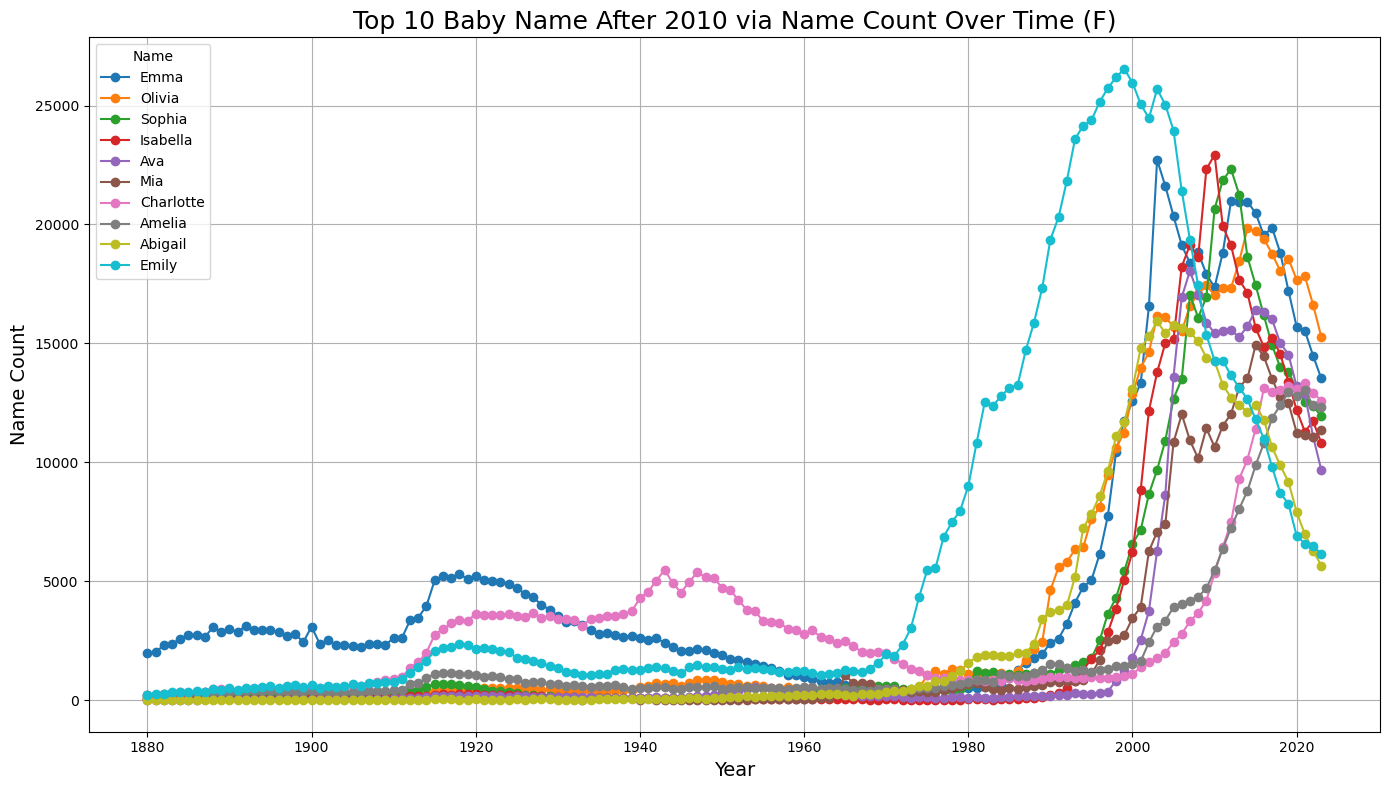

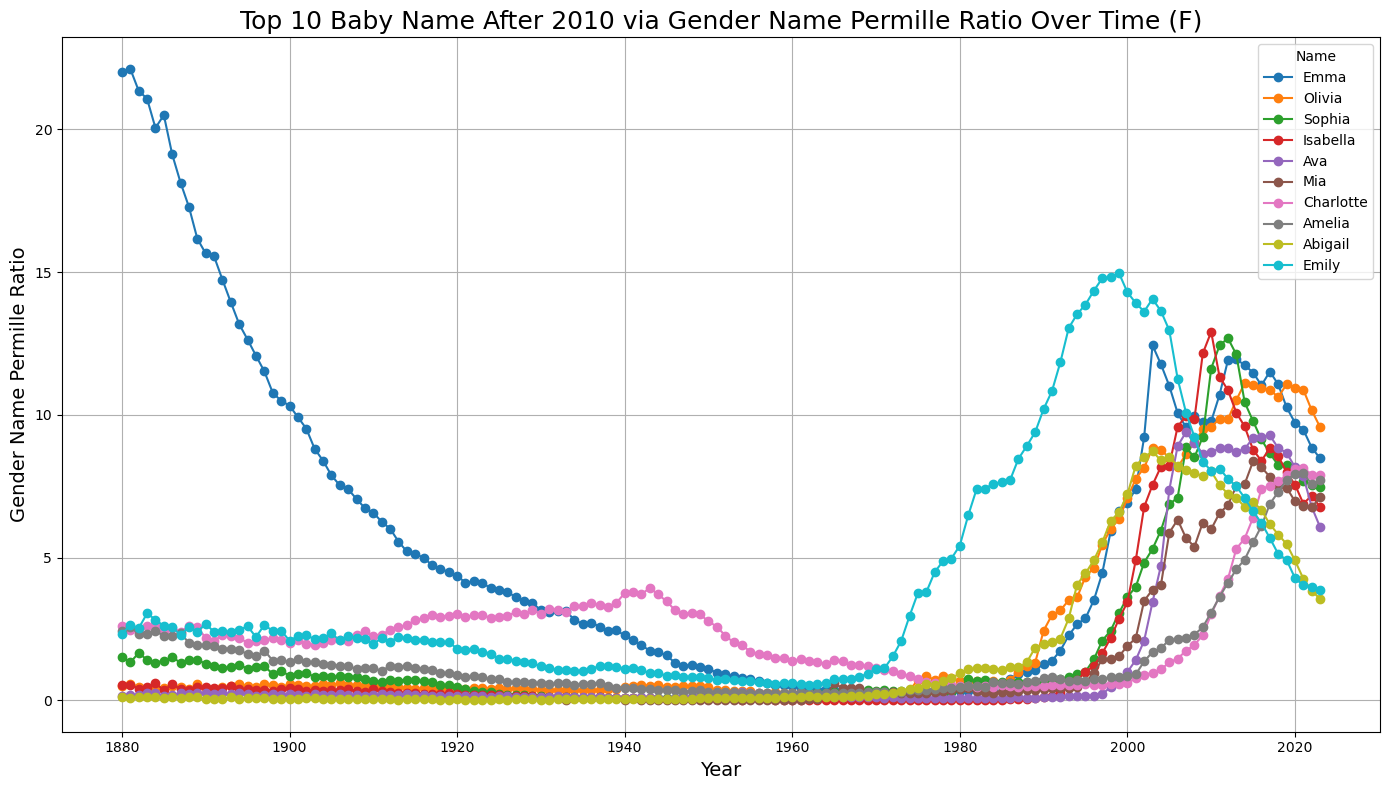

In [60]:
# Function to plot name metrics over time
def plot_name_trend(data, names, metric, gender, title, ylabel):
    plt.figure(figsize=(14, 8))

    for name in names:
        name_data = data[(data['Name'] == name) & (data['Gender'] == gender)]
        plt.plot(name_data['Year'], name_data[metric], marker='o', label=name)

    plt.title(f'{title} Over Time ({gender})', fontsize=18)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.legend(title='Name')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Names to plot (you can choose from the top names calculated earlier)
names_to_plot = top_female_names_gender_ratio   
# Plotting Name Count over Time
plot_name_trend(name_ratio_df, names_to_plot, 'Count', 'F', 'Top 10 Baby Name After 2010 via Name Count', 'Name Count')

# Plotting Gender Name Ratio over Time
plot_name_trend(name_ratio_df, names_to_plot, 'Gender_Name_Ratio', 'F', 'Top 10 Baby Name After 2010 via Gender Name Permille Ratio', 'Gender Name Permille Ratio')


Even though there have been only a few changes in the top 10 female baby names, the overall trend still indicates that parents today tend to prefer names that were less popular in the past. This shift suggests a broader movement towards choosing unique or previously underused names, reflecting a desire for individuality and distinction in naming conventions. Despite the relative stability in the top names, this underlying trend highlights how cultural preferences continue to evolve, with parents increasingly seeking names that stand out from those of previous generations.

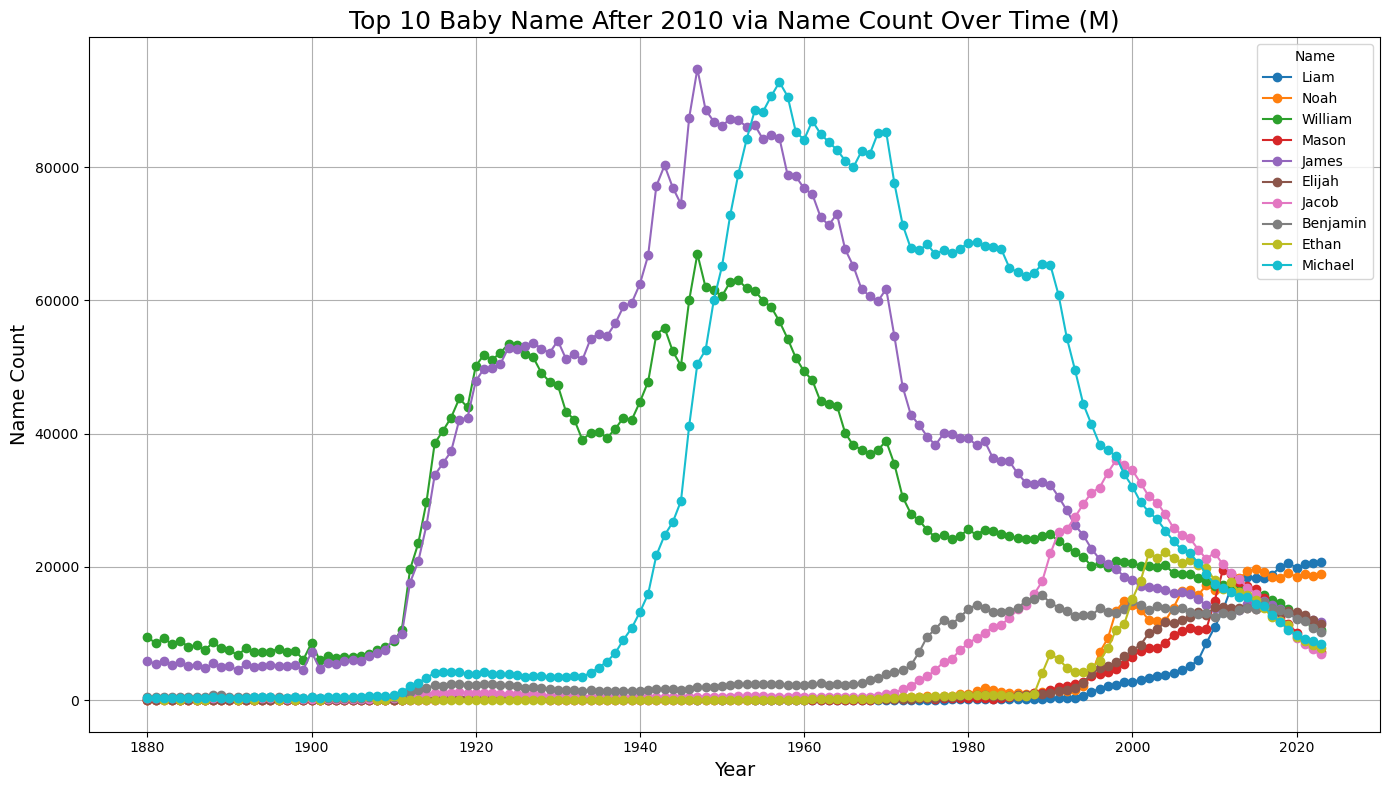

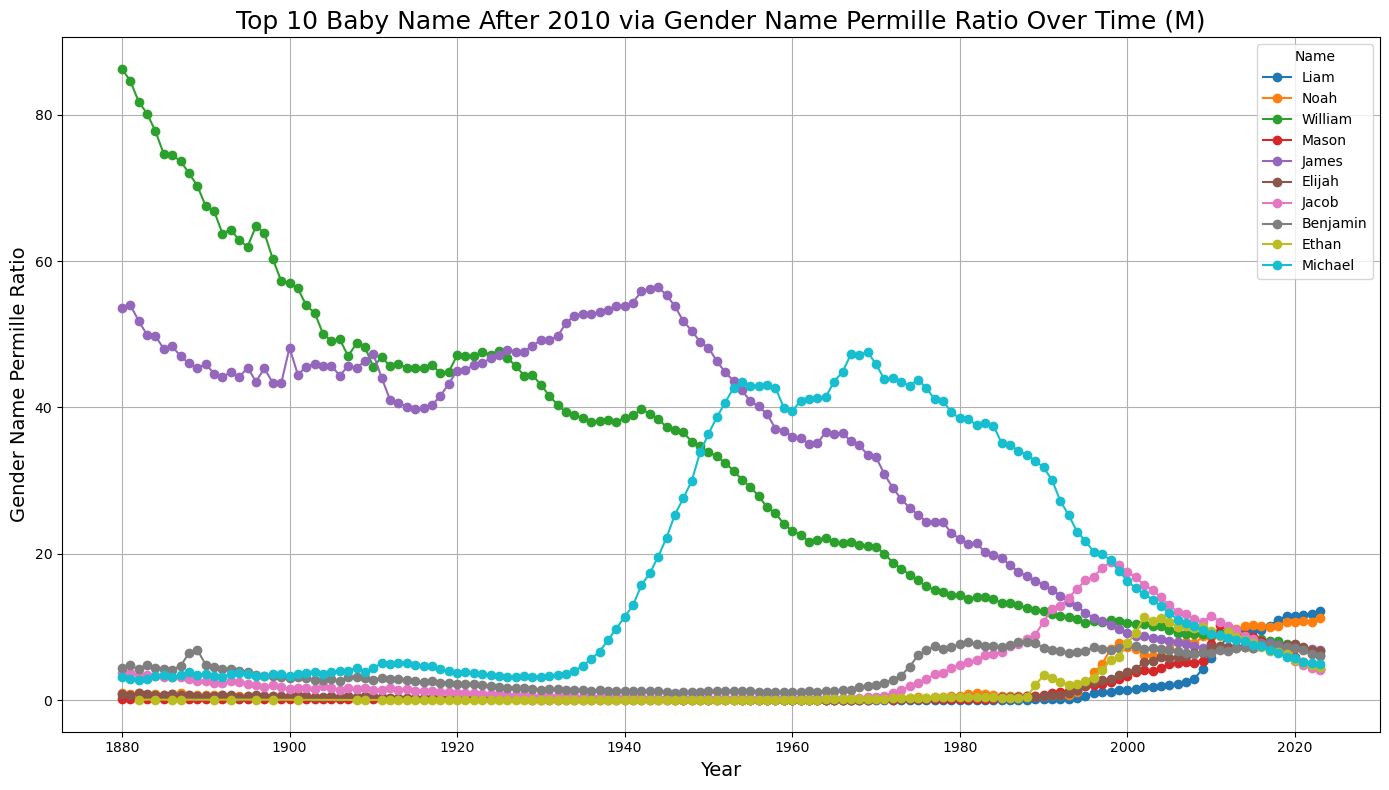

In [61]:
# Function to plot name metrics over time
def plot_name_trend(data, names, metric, gender, title, ylabel):
    plt.figure(figsize=(14, 8))

    for name in names:
        name_data = data[(data['Name'] == name) & (data['Gender'] == gender)]
        plt.plot(name_data['Year'], name_data[metric], marker='o', label=name)

    plt.title(f'{title} Over Time ({gender})', fontsize=18)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.legend(title='Name')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Names to plot (you can choose from the top names calculated earlier)
names_to_plot = top_male_names_gender_ratio  # or top_male_names_gender_ratio, etc.

# Plotting Name Count over Time
plot_name_trend(name_ratio_df, names_to_plot, 'Count', 'M', 'Top 10 Baby Name After 2010 via Name Count', 'Name Count')

# Plotting Gender Name Ratio over Time
plot_name_trend(name_ratio_df, names_to_plot, 'Gender_Name_Ratio', 'M', 'Top 10 Baby Name After 2010 via Gender Name Permille Ratio', 'Gender Name Permille Ratio')


This tendency is even more pronounced for male baby names. Despite five new names entering the top 10, they still reflect the same preference for names that were less popular in the past. This could be a signal that, in recent years, parents are placing greater emphasis on individualism, diversity, and uniqueness when choosing names for their children. The shift towards more distinctive names suggests a cultural movement where standing out and expressing individuality has become increasingly important in the context of naming trends.

### **4.2.3** Popular Baby Name after 2015

In [62]:
# Function to get the top names by total gender name ratio after the year 2015
def get_top_names_gender_ratio(data, gender, top_n=10):
    gender_data = data[(data['Gender'] == gender) & (data['Year'] > 2015)]
    gender_name_ratio_sum = gender_data.groupby('Name')['Gender_Name_Ratio'].sum().sort_values(ascending=False)

    return gender_name_ratio_sum.head(top_n).index.tolist()

# Function to get the top names by total national name ratio after the year 2015
def get_top_names_name_ratio(data, gender, top_n=10):
    gender_data = data[(data['Gender'] == gender) & (data['Year'] > 2015)]
    national_name_ratio_sum = gender_data.groupby('Name')['Name_Ratio'].sum().sort_values(ascending=False)
    
    return national_name_ratio_sum.head(top_n).index.tolist()

# Function to get the top names by total name count after the year 2015
def get_top_names_name_count(data, gender, top_n=10):
    gender_data = data[(data['Gender'] == gender) & (data['Year'] > 2015)]
    name_count_sum = gender_data.groupby('Name')['Count'].sum().sort_values(ascending=False)
    
    return name_count_sum.head(top_n).index.tolist()

# Get top 5 female and male names by gender ratio after year 2015
top_female_names_gender_ratio = get_top_names_gender_ratio(name_ratio_df, 'F')
top_male_names_gender_ratio = get_top_names_gender_ratio(name_ratio_df, 'M')

# Get top 5 female and male names by national ratio after year 2015
top_female_names_national_ratio = get_top_names_name_ratio(name_ratio_df, 'F')
top_male_names_national_ratio = get_top_names_name_ratio(name_ratio_df, 'M')

# Get top 5 female and male names by name count after year 2015
top_female_names_count = get_top_names_name_count(name_ratio_df, 'F')
top_male_names_count = get_top_names_name_count(name_ratio_df, 'M')

# Print the results
print("\nPopular Female Baby Names by Gender Permille Ratio After 2015:")
print(top_female_names_gender_ratio)
print("\nPopular Male Baby Names by Gender Permille Ratio After 2015:")
print(top_male_names_gender_ratio)

print("\nPopular Female Baby Names by National Permille Ratio After 2015:")
print(top_female_names_national_ratio)
print("\nPopular Male Baby Names by National Permille Ratio After 2015:")
print(top_male_names_national_ratio)

print("\nPopular Female Baby Names by Name Counting After 2015:")
print(top_female_names_count)
print("\nPopular Male Baby Names by Name Counting After 2015:")
print(top_male_names_count)


Popular Female Baby Names by Gender Permille Ratio After 2015:
['Olivia', 'Emma', 'Sophia', 'Ava', 'Charlotte', 'Isabella', 'Amelia', 'Mia', 'Evelyn', 'Harper']

Popular Male Baby Names by Gender Permille Ratio After 2015:
['Liam', 'Noah', 'Oliver', 'William', 'James', 'Elijah', 'Benjamin', 'Lucas', 'Henry', 'Mason']

Popular Female Baby Names by National Permille Ratio After 2015:
['Olivia', 'Emma', 'Sophia', 'Ava', 'Charlotte', 'Isabella', 'Amelia', 'Mia', 'Evelyn', 'Harper']

Popular Male Baby Names by National Permille Ratio After 2015:
['Liam', 'Noah', 'Oliver', 'William', 'James', 'Elijah', 'Benjamin', 'Lucas', 'Henry', 'Mason']

Popular Female Baby Names by Name Counting After 2015:
['Olivia', 'Emma', 'Sophia', 'Ava', 'Charlotte', 'Isabella', 'Amelia', 'Mia', 'Evelyn', 'Harper']

Popular Male Baby Names by Name Counting After 2015:
['Liam', 'Noah', 'Oliver', 'William', 'James', 'Elijah', 'Benjamin', 'Lucas', 'Mason', 'Henry']


`Popular Female Baby Names by Gender Permille Ratio After 2000:
['Emma', 'Olivia', 'Isabella', 'Sophia', 'Emily', 'Ava', 'Madison', 'Abigail', 'Mia', 'Elizabeth']`

`Popular Female Baby Names by Gender Ratio After 2010:
['Emma', 'Olivia', 'Sophia', 'Isabella', 'Ava', 'Mia', 'Charlotte', 'Amelia', 'Abigail', 'Emily']`

`Popular Female Baby Names by Gender Permille Ratio After 2015:
['Olivia', 'Emma', 'Sophia', 'Ava', 'Charlotte', 'Isabella', 'Amelia', 'Mia', 'Evelyn', 'Harper']`

`Popular Male Baby Names by Gender Permille Ratio After 2000:
['Jacob', 'Michael', 'Noah', 'William', 'Ethan', 'Daniel', 'Matthew', 'Alexander', 'James', 'Joshua']`

`Popular Male Baby Names by Gender Ratio After 2010:
['Liam', 'Noah', 'William', 'Mason', 'James', 'Elijah', 'Jacob', 'Benjamin', 'Ethan', 'Michael']`

`Popular Male Baby Names by Gender Permille Ratio After 2015:
['Liam', 'Noah', 'Oliver', 'William', 'James', 'Elijah', 'Benjamin', 'Lucas', 'Henry', 'Mason']`

When considering the top popular names after 2015, we notice an additional two new names in the female baby names and only three new names in the male baby names. This further demonstrates that the popularity of baby names has a lifecycle; it doesn't change abruptly but rather shows consistency and evolves gradually. These patterns indicate that while new names do emerge, the overall trends tend to shift slowly, reflecting a steady, ongoing evolution in naming preferences rather than sudden changes.

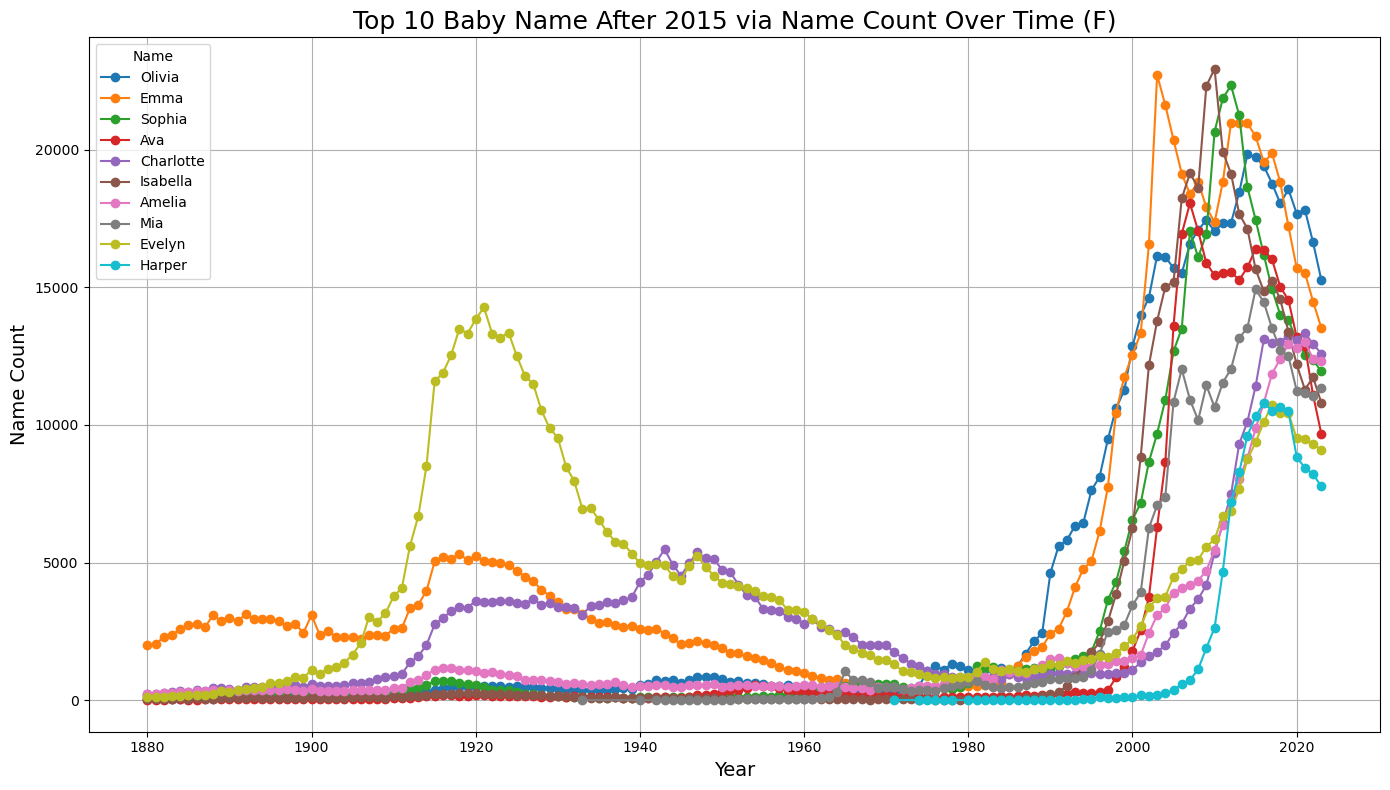

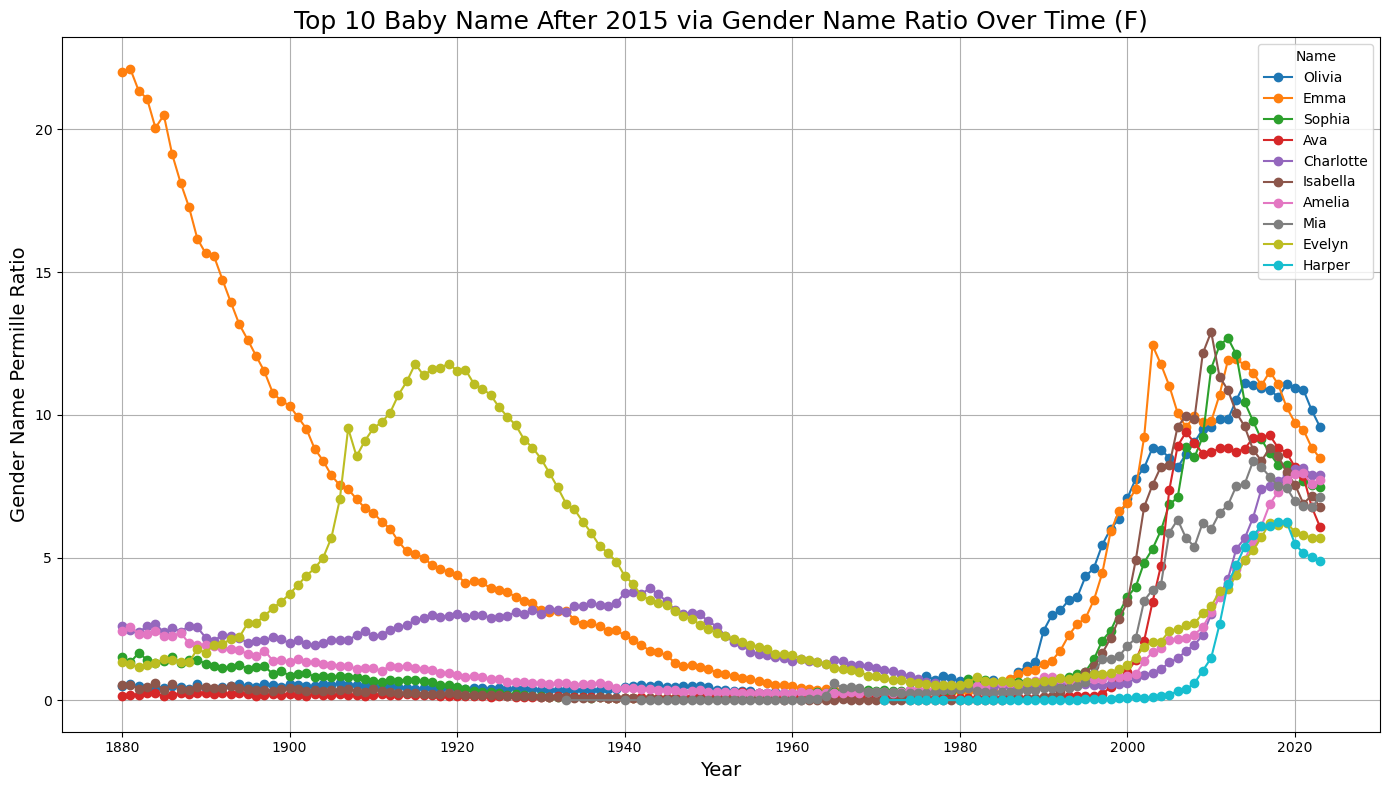

In [63]:
# Function to plot name metrics over time
def plot_name_trend(data, names, metric, gender, title, ylabel):
    plt.figure(figsize=(14, 8))

    for name in names:
        name_data = data[(data['Name'] == name) & (data['Gender'] == gender)]
        plt.plot(name_data['Year'], name_data[metric], marker='o', label=name)

    plt.title(f'{title} Over Time ({gender})', fontsize=18)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.legend(title='Name')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Names to plot (you can choose from the top names calculated earlier)
names_to_plot = top_female_names_gender_ratio  # or top_male_names_gender_ratio, etc.

# Plotting Name Count over Time
plot_name_trend(name_ratio_df, names_to_plot, 'Count', 'F', 'Top 10 Baby Name After 2015 via Name Count', 'Name Count')

# Plotting Gender Name Ratio over Time
plot_name_trend(name_ratio_df, names_to_plot, 'Gender_Name_Ratio', 'F', 'Top 10 Baby Name After 2015 via Gender Name Ratio', 'Gender Name Permille Ratio')


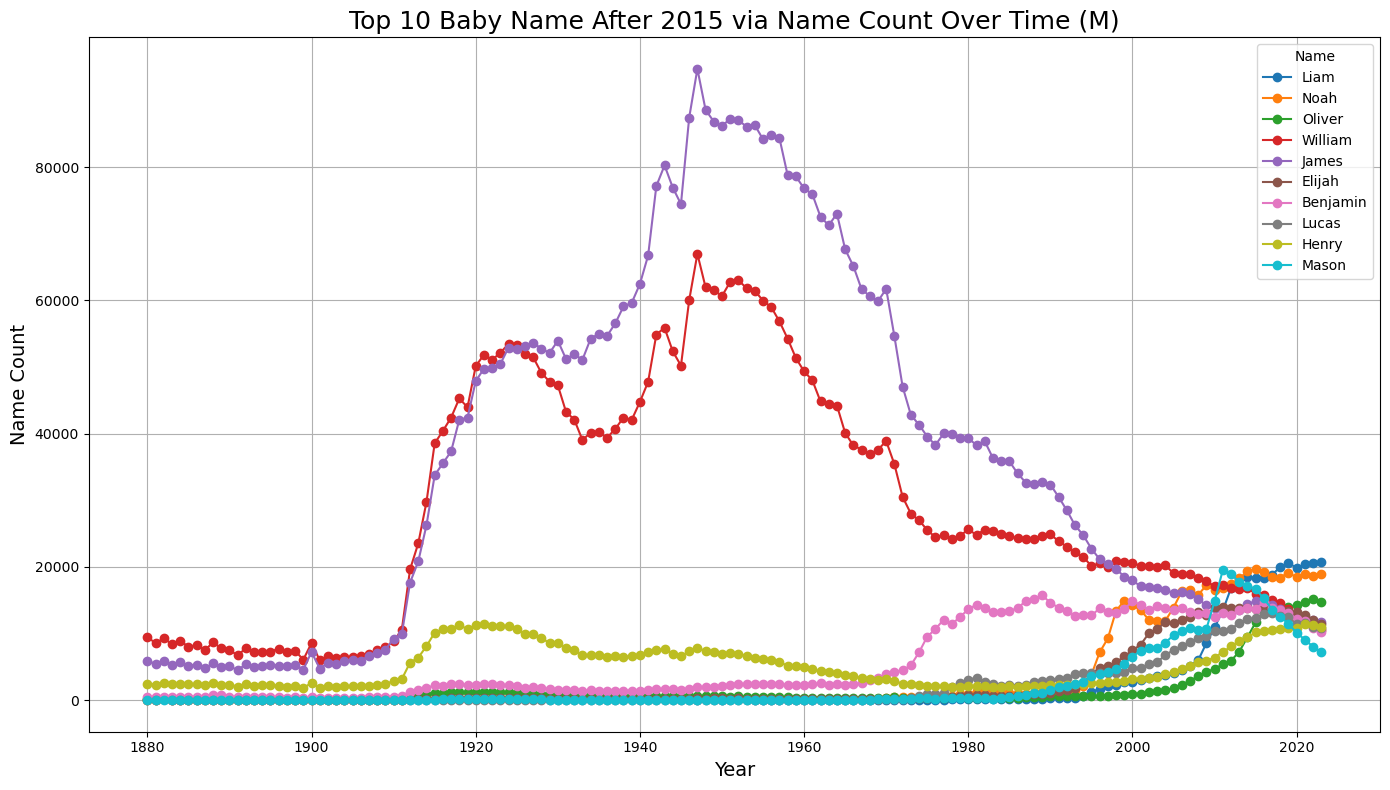

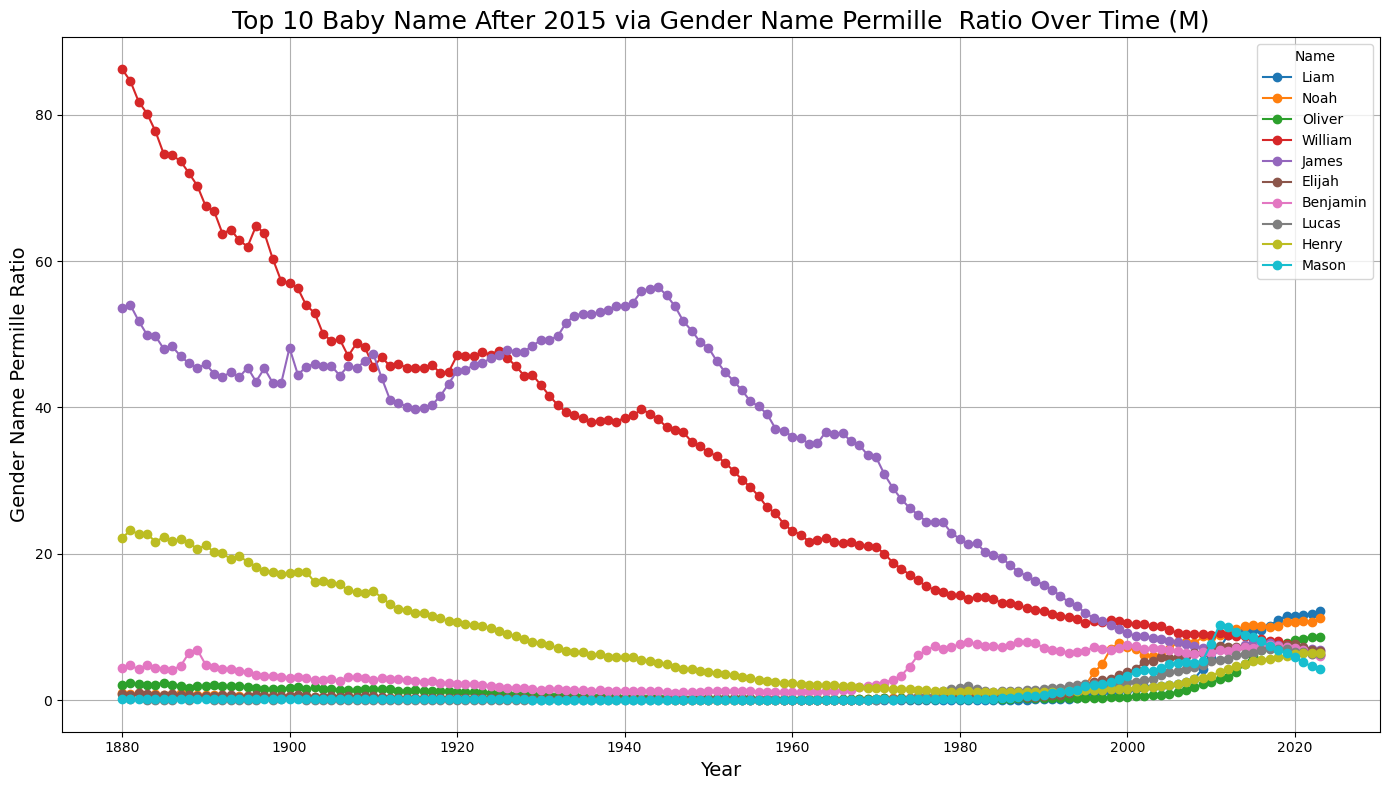

In [64]:
# Function to plot name metrics over time
def plot_name_trend(data, names, metric, gender, title, ylabel):
    plt.figure(figsize=(14, 8))

    for name in names:
        name_data = data[(data['Name'] == name) & (data['Gender'] == gender)]
        plt.plot(name_data['Year'], name_data[metric], marker='o', label=name)

    plt.title(f'{title} Over Time ({gender})', fontsize=18)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.legend(title='Name')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Names to plot (you can choose from the top names calculated earlier)
names_to_plot = top_male_names_gender_ratio  

# Plotting Name Count over Time
plot_name_trend(name_ratio_df, names_to_plot, 'Count', 'M', 'Top 10 Baby Name After 2015 via Name Count', 'Name Count')

# Plotting Gender Name Ratio over Time
plot_name_trend(name_ratio_df, names_to_plot, 'Gender_Name_Ratio', 'M', 'Top 10 Baby Name After 2015 via Gender Name Permille  Ratio', 'Gender Name Permille Ratio')


The overall trend remains consistent with previous observations: while most popular names today were less commonly used in the past, certain names like James and William have maintained their popularity over the years. This suggests that while naming preferences evolve, some names have a timeless appeal and continue to be favored across generations. These enduring names contrast with the broader trend of less common names rising in popularity, highlighting how certain classics remain consistently well-loved, even as the overall landscape of baby names changes.

### **4.3** Famous People Influence

### **4.3.1**  Bill Gates vs. Elon Musk

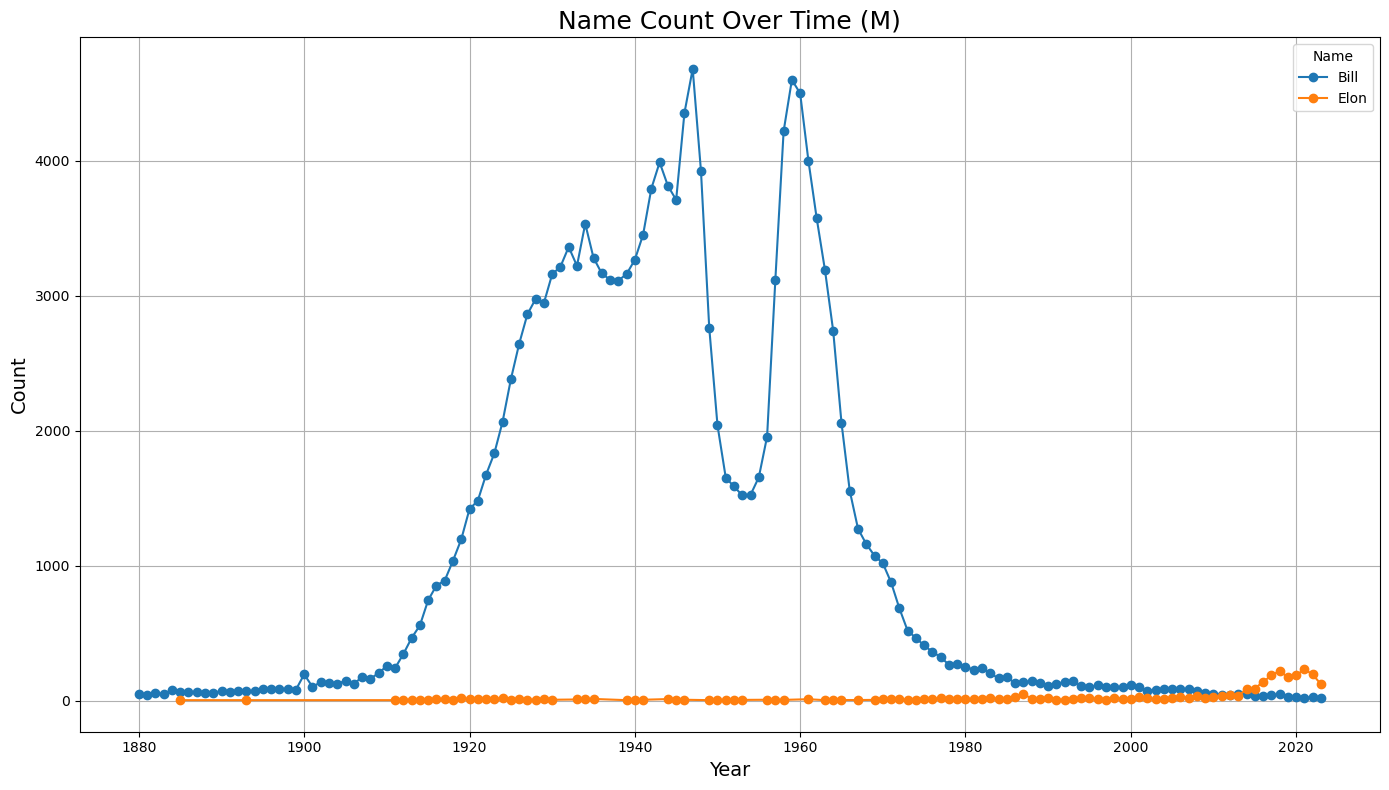

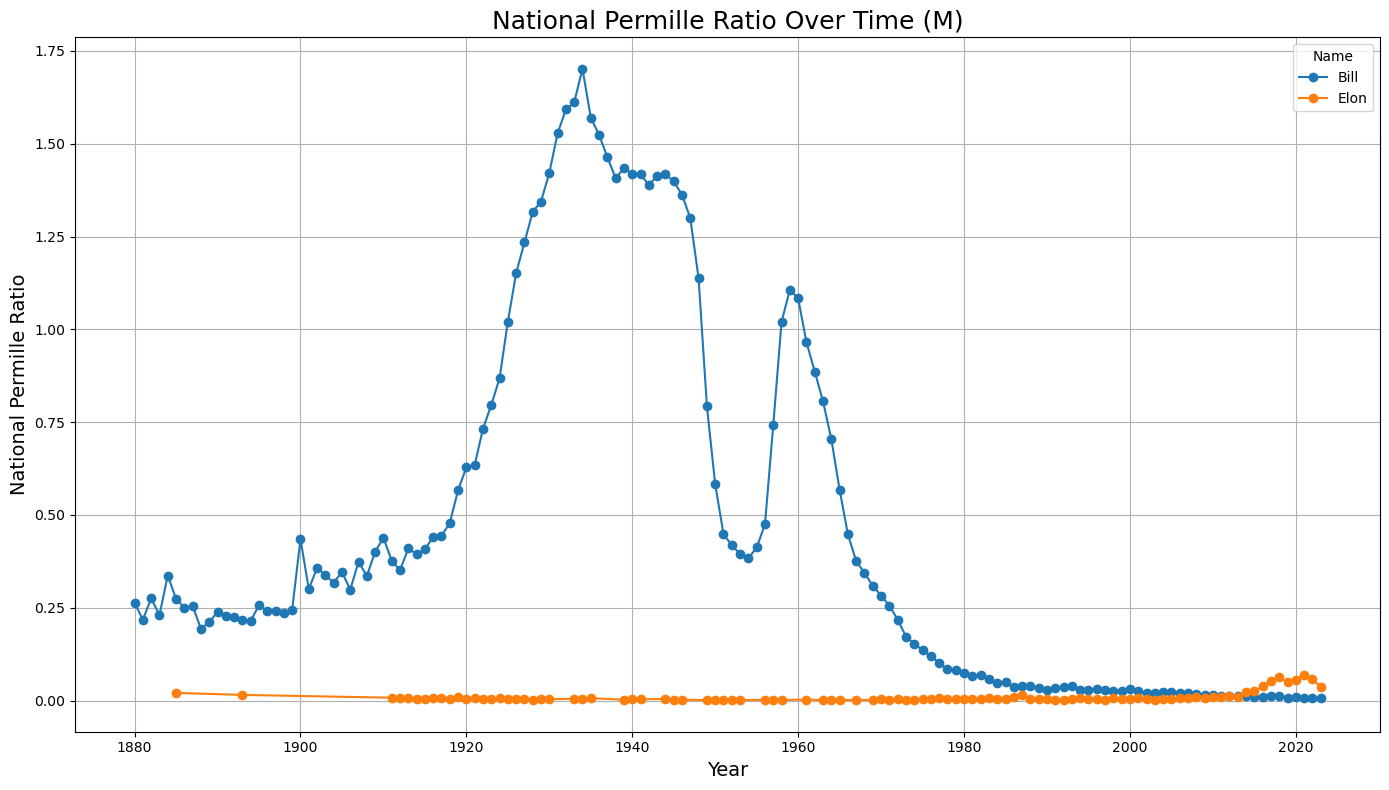

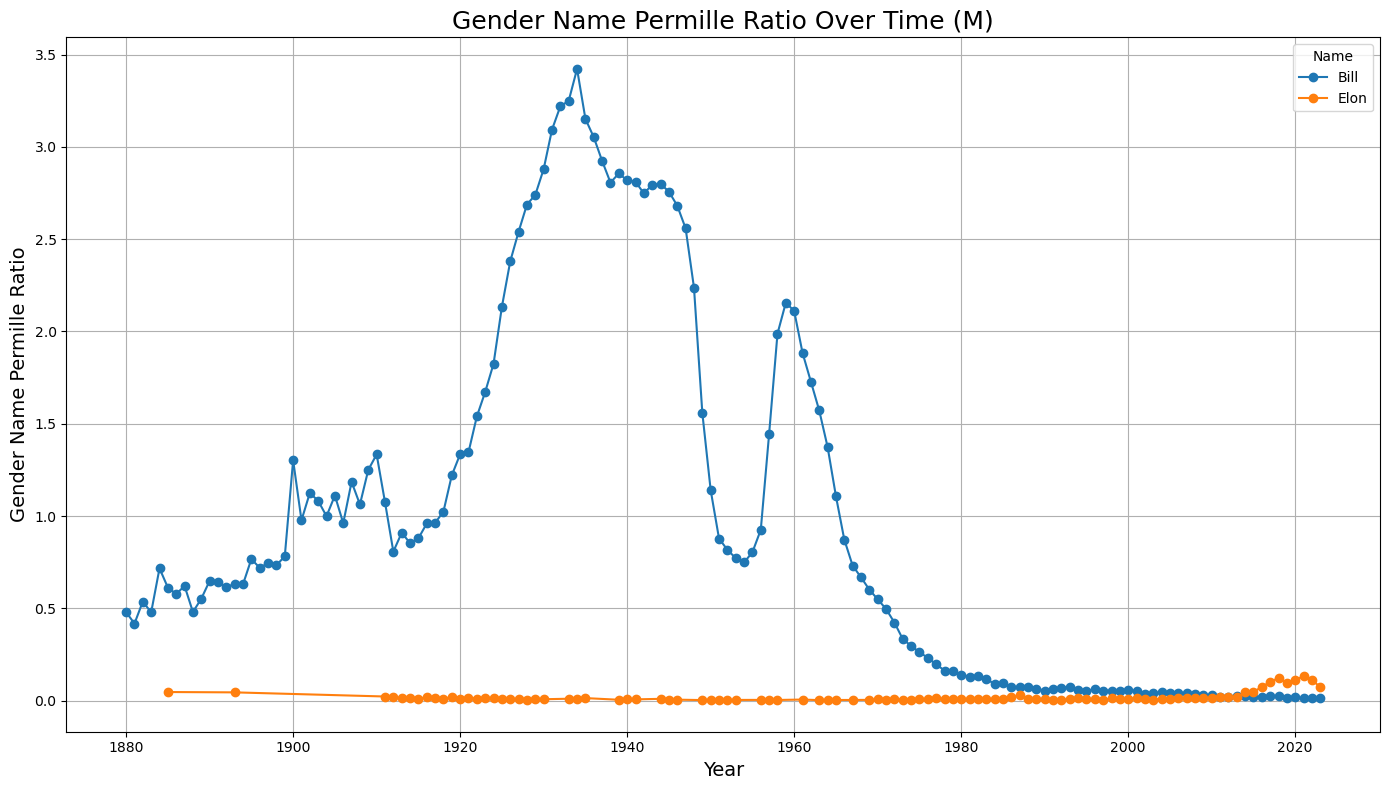

In [65]:
# Function to plot name metrics over time
def plot_name_trend(data, names, metric, gender, title, ylabel):
    plt.figure(figsize=(14, 8))

    for name in names:
        name_data = data[(data['Name'] == name) & (data['Gender'] == gender)]
        plt.plot(name_data['Year'], name_data[metric], marker='o', label=name)

    plt.title(f'{title} Over Time ({gender})', fontsize=18)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.legend(title='Name')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Names to plot
names_to_plot = ['Bill', 'Elon']

# Plotting Name Count over Time
plot_name_trend(name_ratio_df, names_to_plot, 'Count', 'M', 'Name Count', 'Count')

# Plotting National Ratio over Time
plot_name_trend(name_ratio_df, names_to_plot, 'Name_Ratio', 'M', 'National Permille Ratio', 'National Permille Ratio')

# Plotting Gender Name Ratio over Time
plot_name_trend(name_ratio_df, names_to_plot, 'Gender_Name_Ratio', 'M', 'Gender Name Permille Ratio', 'Gender Name Permille Ratio')


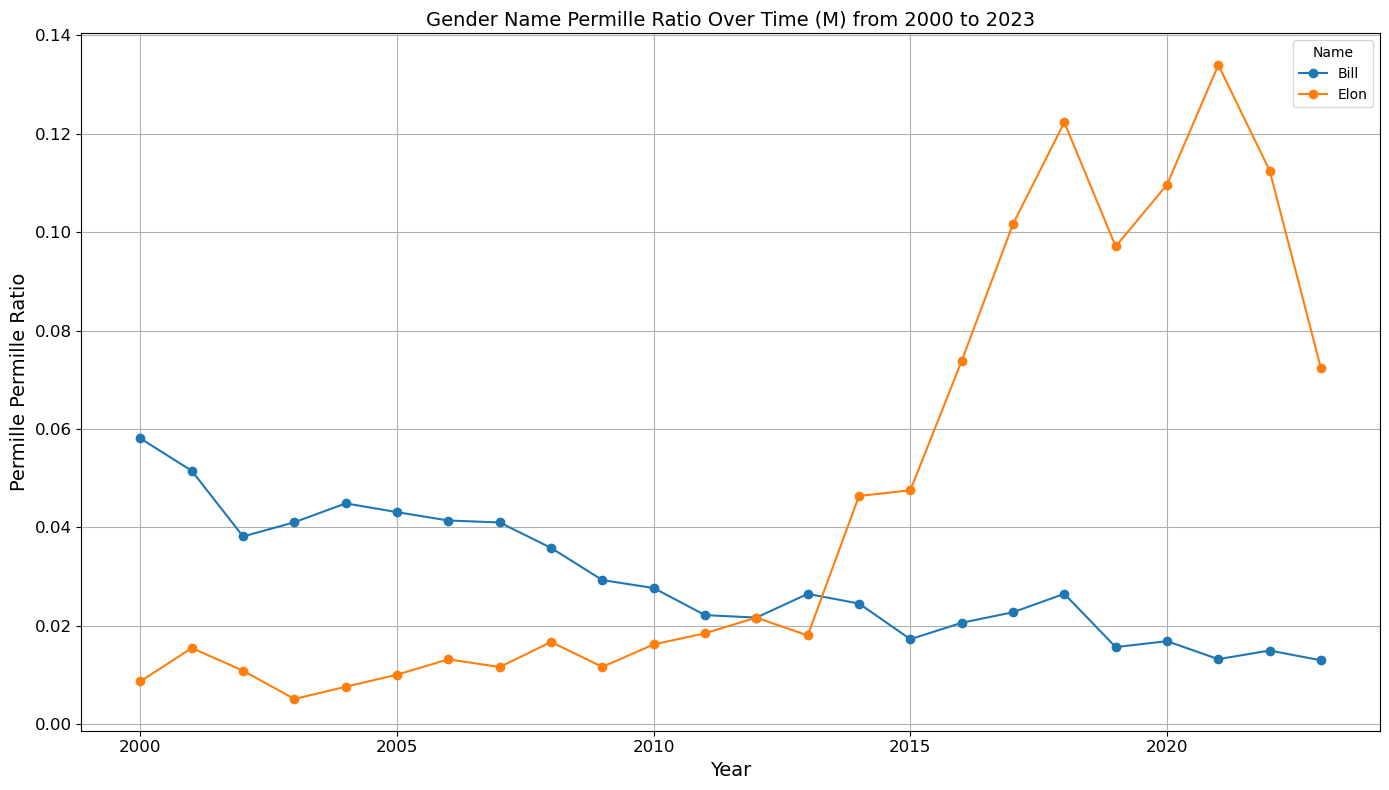

In [66]:
# Function to plot name metrics over time with year filter
def plot_name_trend_filtered(data, names, metric, gender, title, ylabel, start_year, end_year):
    # Filter data for the specified year range
    filtered_data = data[(data['Year'] >= start_year) & (data['Year'] <= end_year)]
    
    plt.figure(figsize=(14, 8))

    for name in names:
        name_data = filtered_data[(filtered_data['Name'] == name) & (filtered_data['Gender'] == gender)]
        plt.plot(name_data['Year'], name_data[metric], marker='o', label=name)

    plt.title(f'{title} Over Time ({gender}) from {start_year} to {end_year}', fontsize=14)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(fontsize=12)  
    plt.yticks(fontsize=12)
    plt.legend(title='Name')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Names to plot
names_to_plot = ['Bill', 'Elon']

# Define the year range
start_year = 2000
end_year = 2023

# Plotting Gender Name Ratio over Time for male names from 2000 to 2023
plot_name_trend_filtered(name_ratio_df, names_to_plot, 'Gender_Name_Ratio', 'M', 'Gender Name Permille Ratio', 'Permille Permille Ratio', start_year, end_year)


Elon Musk gained significant fame around May 2012, and this rise in his public profile had a noticeable impact on the popularity of the name "Elon," which had been rarely used before. The name saw an increase of more than tenfold in usage compared to previous years. It's important to consider that the spread of his reputation took some time, and there is naturally a delay between when parents are influenced by a figure's fame and when they actually name their child, given the time needed for pregnancy and birth. This delay is entirely reasonable and expected in trends like these.

#### Google Trends

In [67]:
# Load data from CSV file
df = pd.read_csv('multiTimeline1.csv', skiprows=1)
df.head()

Month  Bill Gates: (United States) Elon Musk: (United States)
0  2004-01                            4                          0
1  2004-02                            7                          0
2  2004-03                            4                          0
3  2004-04                            3                          0
4  2004-05                            3                          0

In [68]:
df.shape

(248, 3)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Month                        248 non-null    object
 1   Bill Gates: (United States)  248 non-null    int64 
 2   Elon Musk: (United States)   248 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.9+ KB


In [70]:
print(df['Elon Musk: (United States)'].head())

0    0
1    0
2    0
3    0
4    0
Name: Elon Musk: (United States), dtype: object


In [71]:
df.replace('<1', 0.5, inplace=True)
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric)  

print(df['Elon Musk: (United States)'].head())

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Elon Musk: (United States), dtype: object


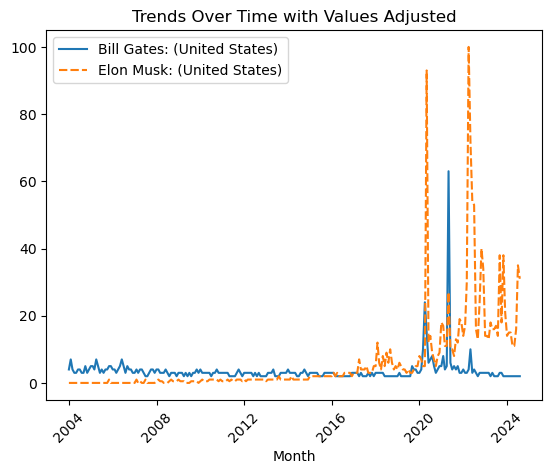

In [72]:
df['Month'] = pd.to_datetime(df['Month'])

# Set the 'Month' column as the index
df.set_index('Month', inplace=True)

# Plot the data using seaborn
sns.lineplot(data=df)
plt.xticks(rotation=45)
plt.title("Trends Over Time with Values Adjusted")
plt.show()

Google Trends data shows that Elon Musk's popularity surpassed that of Bill Gates in 2015, with a noticeable rise starting in 2013. This trend aligns with the increasing popularity of the baby name "Elon," further illustrating the influence of famous figures on baby naming patterns. However, predicting the trend for the name "Bill" is more complex, as many celebrities share that first name, making it difficult to directly correlate its popularity with any single individual.

### **4.3.2** Game of thrones -- Daenerys

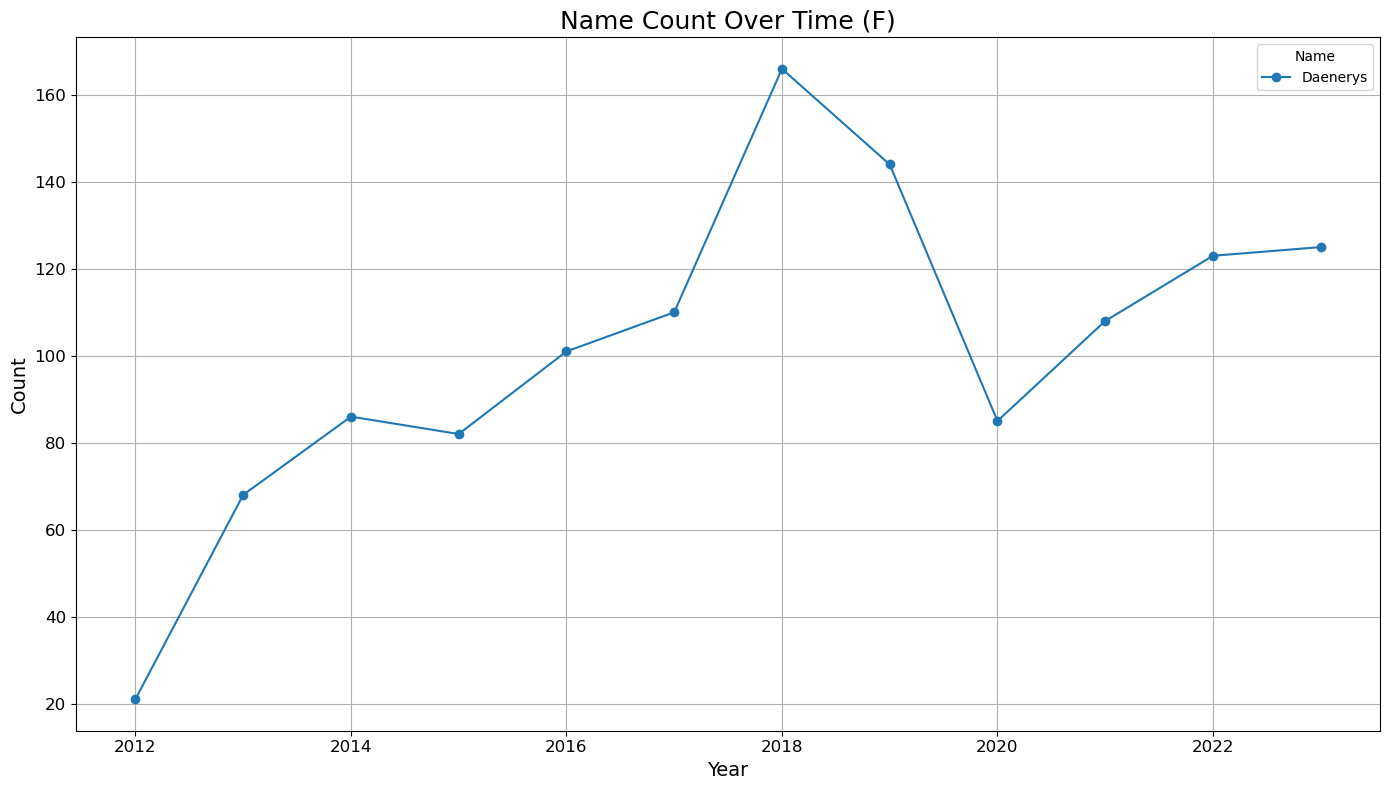

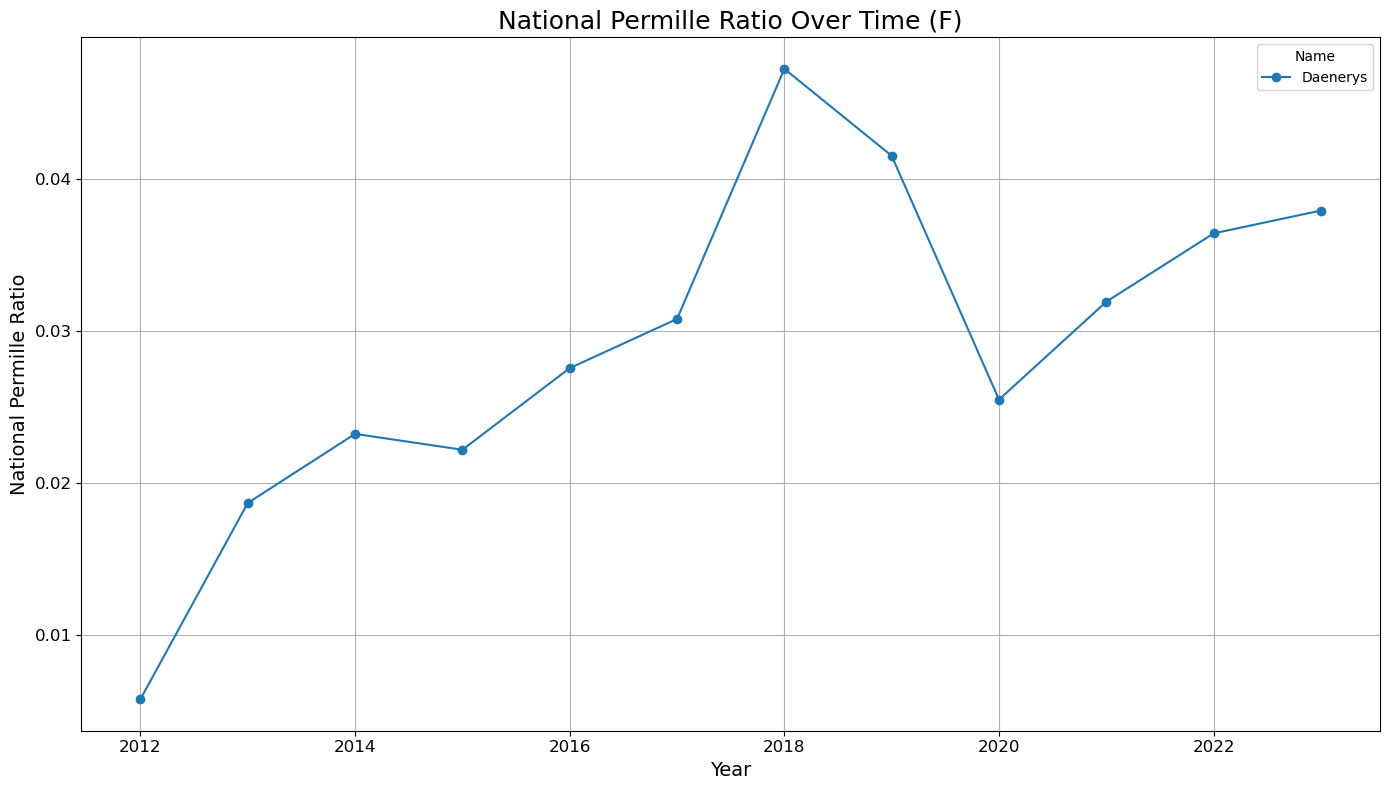

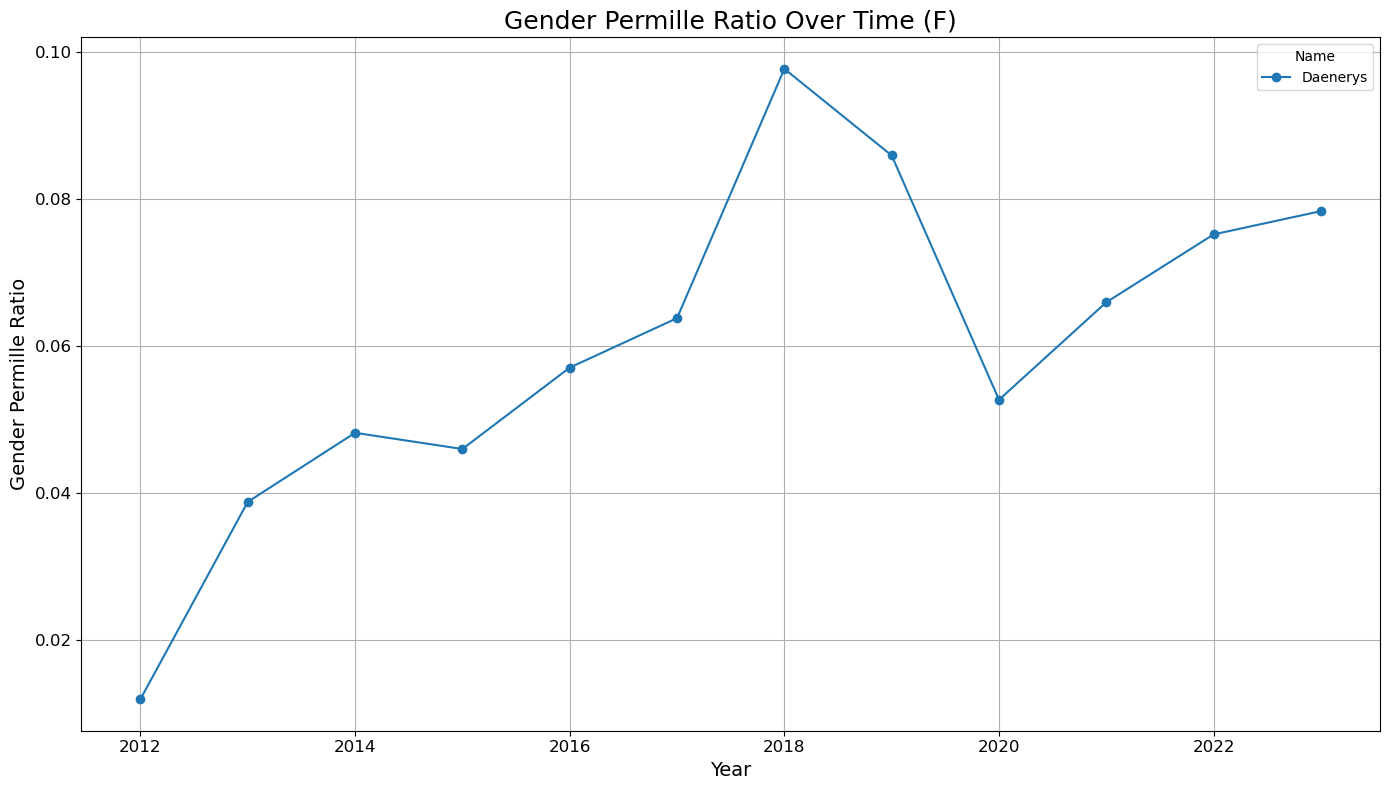

In [73]:
# Function to plot name metrics over time
def plot_name_trend(data, names, metric, gender, title, ylabel):
    plt.figure(figsize=(14, 8))

    for name in names:
        name_data = data[(data['Name'] == name) & (data['Gender'] == gender)]
        plt.plot(name_data['Year'], name_data[metric], marker='o', label=name)

    plt.title(f'{title} Over Time ({gender})', fontsize=18)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(fontsize=12)  
    plt.yticks(fontsize=12)
    plt.legend(title='Name')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Names to plot
names_to_plot = ['Daenerys']

# Plotting Name Count over Time
plot_name_trend(name_ratio_df, names_to_plot, 'Count', 'F', 'Name Count', 'Count')

# Plotting National Ratio over Time
plot_name_trend(name_ratio_df, names_to_plot, 'Name_Ratio', 'F', 'National Permille Ratio', 'National Permille Ratio')

# Plotting Gender Name Ratio over Time
plot_name_trend(name_ratio_df, names_to_plot, 'Gender_Name_Ratio', 'F', 'Gender Permille Ratio', 'Gender Permille Ratio')


Game of Thrones(8 seasons)

Season1: April 1  2011 

Season2: April 1, 2012

Season3: March 31, 2013

Season4: April 6, 2014

Season5: June 14, 2015

Season6: April 24, 2016

Season7: July 16, 2017

Season8: April 14, 2019 

Season 1-6 high popularity, especially season 6. 

Seanson 8:
While the performances, production values and music score were praised, criticism was mainly directed at the shorter runtime of the season as well as numerous creative decisions made by the showrunners regarding the plot and character arcs. Many commentators deemed it to be a disappointing conclusion to the series.(https://en.wikipedia.org/wiki/Game_of_Thrones_season_8#:~:text=While%20the%20performances%2C%20production%20values,disappointing%20conclusion%20to%20the%20series.)

The TV series Game of Thrones had a significant influence on baby names, particularly with the character Daenerys. Initially, there was a delayed but noticeable increase in the popularity of the name as the character gained fame. This trend continued, with the name becoming increasingly popular over time. However, after the controversial events in Season 8, where many fans felt disappointed with Daenerys's character arc, the popularity of the name saw a decline. Despite this diappointment, the name remained relatively popular even after the series ended, indicating that the character's overall impact and cultural significance continued to resonate with people.

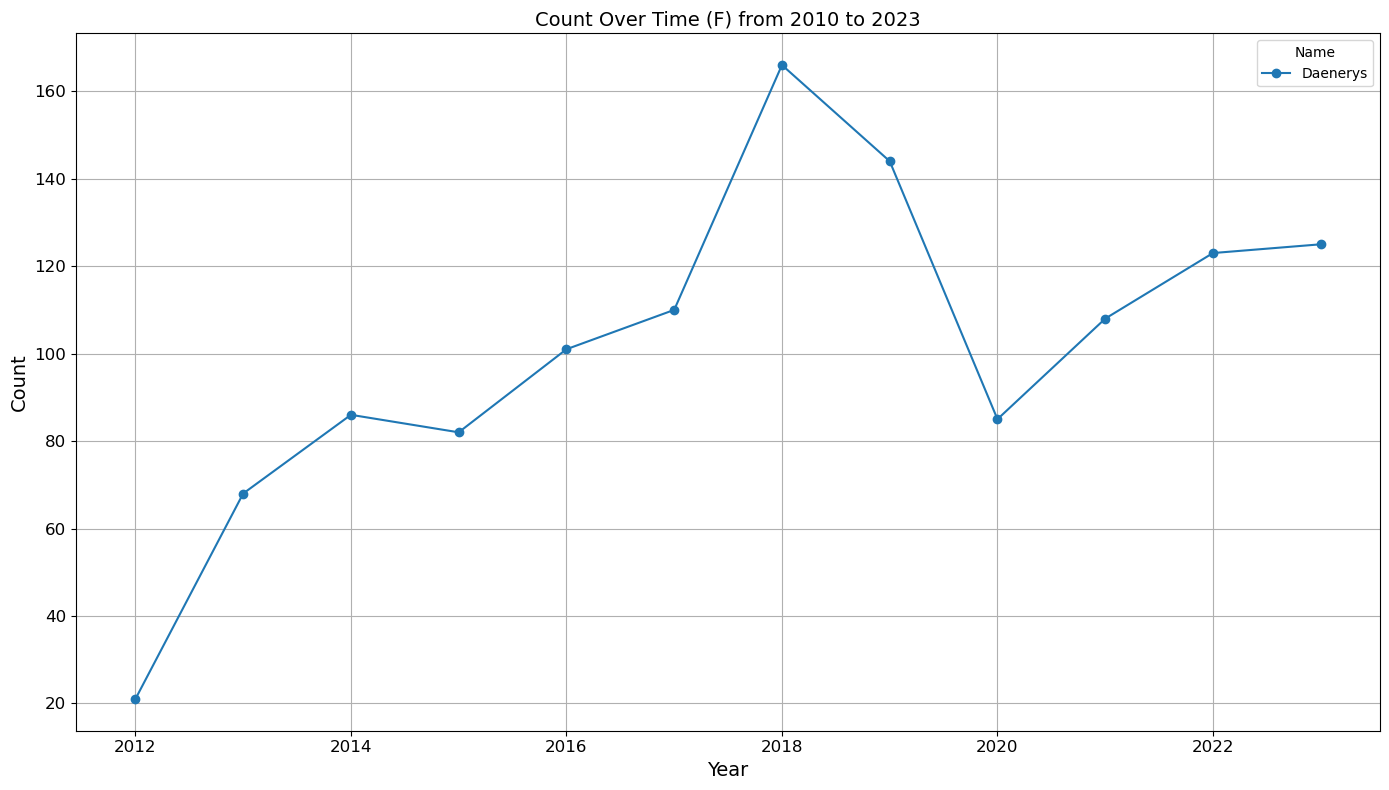

In [76]:
# Function to plot name metrics over time with year filter
def plot_name_trend_filtered(data, names, metric, gender, title, ylabel, start_year, end_year):
    # Filter data for the specified year range
    filtered_data = data[(data['Year'] >= start_year) & (data['Year'] <= end_year)]
    
    plt.figure(figsize=(14, 8))

    for name in names:
        name_data = filtered_data[(filtered_data['Name'] == name) & (filtered_data['Gender'] == gender)]
        plt.plot(name_data['Year'], name_data[metric], marker='o', label=name)

    plt.title(f'{title} Over Time ({gender}) from {start_year} to {end_year}', fontsize=14)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(fontsize=12)  
    plt.yticks(fontsize=12)
    plt.legend(title='Name')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Names to plot
names_to_plot = ['Daenerys']

# Define the year range
start_year = 2010
end_year = 2023

# Plotting Gender Name Ratio over Time for male names from 2000 to 2023
plot_name_trend_filtered(name_ratio_df, names_to_plot, 'Count', 'F', 'Count', 'Count', start_year, end_year)
